# <center> Models Analysis </center>

## <center>Tuning baseline models </center>


|                    |                 Random Forest |            LightGBM |                      XGBoost |           CatBoost |                MLP Classifier |
|-------------------:|------------------------------:|--------------------:|-----------------------------:|-------------------:|------------------------------:|
|           Accuracy |                        0.7395 |              0.7411 |                        0.395 |             0.7395 |                        0.7393 |
|            ROC AUC |                      0.642177 |            0.643960 |                     0.642581 |           0.633388 |                      0.634936 |
| Tuning improvement |                       + 0.027 |             + 0.013 |                      + 0.003 |            + 0.017 |               -               |
|        Tuning Time | 2 hours , 49 mins and 45 secs | 11 mins and 10 secs | 4 hours , 8 mins and 41 secs | 9 mins and 10 secs | 4 hours , 20 mins and 44 secs |
|     Inference Time |                 0.048623 secs |       0.006243 secs |                0.007087 secs |      0.013457 secs |                 0.009351 secs |
|               Size |                       45.34MB |              0.45MB |                       0.79MB |              0.2MB |                        1.56MB |

## Model podium performance



|                     | AUC | Inference time |
|---------------------|-----|----------------|
| XGBoost             | 🥈   | 🥈              |
| CatBoost            |     |              |
| Random Forest |   🥉 |               |
| LightGBMt | 🥇   | 🥇              |
| Multilayer Perceptron |     |      🥉         |

In [5]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from src import utils
from src.models import predict_model
import os 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

----------------------------------
### Load pre-processed data
----------------------------------

In [6]:
X_train = utils.load_data_checkpoint('../data/processed/X_train.pickle')
X_test = utils.load_data_checkpoint('../data/processed/X_test.pickle')
y_train = utils.load_data_checkpoint('../data/processed/y_train.pickle')
y_test = utils.load_data_checkpoint('../data/processed/y_test.pickle')

Object loaded successfully from ../data/processed/X_train.pickle.
Object loaded successfully from ../data/processed/X_test.pickle.
Object loaded successfully from ../data/processed/y_train.pickle.
Object loaded successfully from ../data/processed/y_test.pickle.


In [7]:
print(f"X_train = {X_train.shape}, X_test = {X_test.shape}")
print(f"y_train = {y_train.shape}, y_test = {y_test.shape}")

X_train = (40000, 1773), X_test = (10000, 1773)
y_train = (40000,), y_test = (10000,)


-----------------------------------------------
### 1.0 - Tuning Random Forest Classifier hyperparameters with RandomizedsearchCV 
-----------------------------------------------


In [6]:
#instance object
rf = RandomForestClassifier(n_estimators=1, random_state=42)

params = {
 'bootstrap': [True, False],
 'max_depth': [200, None,300,400],
 'max_features': ['sqrt','log2'],
 'min_samples_leaf': [2,3,4,5,6],
 'min_samples_split': [2,5,10,15],
 'n_estimators': [100,200,300,400],
 'criterion' : ['gini', 'entropy'],  
}

start_time = utils.timer(None)

rforest_randomcv = RandomizedSearchCV(rf, params, n_iter=50, random_state=42, cv=4,scoring='roc_auc',verbose=5)
rforest_randomcv.fit(X_train,y_train)

utils.timer(start_time)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV 1/4] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=100;, score=0.636 total time= 1.0min
[CV 2/4] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=100;, score=0.637 total time= 1.1min
[CV 3/4] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=100;, score=0.631 total time= 1.2min
[CV 4/4] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=100;, score=0.634 total time= 1.2min
[CV 1/4] END bootstrap=False, criterion=gini, max_depth=300, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.629 total time=  39.5s
[CV 2/4] END bootstrap=False, criterion=gini, max_depth=300, m

[CV 4/4] END bootstrap=False, criterion=gini, max_depth=200, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=200;, score=0.628 total time=  25.1s
[CV 1/4] END bootstrap=False, criterion=gini, max_depth=300, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.631 total time=  35.6s
[CV 2/4] END bootstrap=False, criterion=gini, max_depth=300, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.630 total time=  38.2s
[CV 3/4] END bootstrap=False, criterion=gini, max_depth=300, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.624 total time=  37.3s
[CV 4/4] END bootstrap=False, criterion=gini, max_depth=300, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.631 total time=  34.0s
[CV 1/4] END bootstrap=False, criterion=entropy, max_depth=200, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, s

[CV 4/4] END bootstrap=False, criterion=gini, max_depth=200, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=0.634 total time=  31.5s
[CV 1/4] END bootstrap=False, criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.632 total time=  56.2s
[CV 2/4] END bootstrap=False, criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.630 total time=  55.6s
[CV 3/4] END bootstrap=False, criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.625 total time=  53.5s
[CV 4/4] END bootstrap=False, criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.631 total time=  52.8s
[CV 1/4] END bootstrap=False, criterion=gini, max_depth=300, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;,

[CV 4/4] END bootstrap=True, criterion=gini, max_depth=200, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=200;, score=0.637 total time=  58.9s
[CV 1/4] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.641 total time= 1.5min
[CV 2/4] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.641 total time= 1.4min
[CV 3/4] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.636 total time= 1.5min
[CV 4/4] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.636 total time= 1.6min
[CV 1/4] END bootstrap=False, criterion=entropy, max_depth=300, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, sc

[CV 4/4] END bootstrap=False, criterion=gini, max_depth=400, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.633 total time=  41.0s
[CV 1/4] END bootstrap=False, criterion=entropy, max_depth=400, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=200;, score=0.639 total time= 1.3min
[CV 2/4] END bootstrap=False, criterion=entropy, max_depth=400, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=200;, score=0.638 total time= 1.5min
[CV 3/4] END bootstrap=False, criterion=entropy, max_depth=400, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=200;, score=0.632 total time= 1.3min
[CV 4/4] END bootstrap=False, criterion=entropy, max_depth=400, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=200;, score=0.635 total time= 1.4min
[CV 1/4] END bootstrap=True, criterion=gini, max_depth=300, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimat

#### 1.1 - Tunned Random Forest Classifier: Best hyperparameters with RandomizedsearchCV 

In [7]:
print(f'RandomForestClassifier:\n\nBest params:')
for key, values in rforest_randomcv.best_params_.items():
  print(f'{key} : {values}')
print(f"\nBest Score: {rforest_randomcv.best_score_:.6f}\n")

RandomForestClassifier:

Best params:
n_estimators : 200
min_samples_split : 2
min_samples_leaf : 3
max_features : sqrt
max_depth : 200
criterion : entropy
bootstrap : True

Best Score: 0.638750



#### 1.2 - Tunned Random Forest Classifier: Inference time

In [8]:
start_time=utils.timer(None)

y_pred_unit = rforest_randomcv.predict(X_test.iloc[0].values.reshape(1,-1))

utils.timer(start_time)

Time taken by function: 0 hours , 0 mins and 0.198217 secs


/home/app/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### 1.3 - Tunned Random Forest Classifier: Performance metrics and classification report

In [9]:
start_time=utils.timer(None)

y_pred = rforest_randomcv.predict(X_test)

utils.timer(start_time)

Time taken by function: 0 hours , 0 mins and 2.9199 secs


Model Performance metrics:
------------------------------
Accuracy: 0.7395
Precision: 0.8
Recall: 0.0015337423312883436
F1 Score: 0.0030616150019135095

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      7392
           1       0.80      0.00      0.00      2608

    accuracy                           0.74     10000
   macro avg       0.77      0.50      0.43     10000
weighted avg       0.76      0.74      0.63     10000


Prediction Confusion Matrix:
------------------------------
      0  1
0  7391  1
1  2604  4


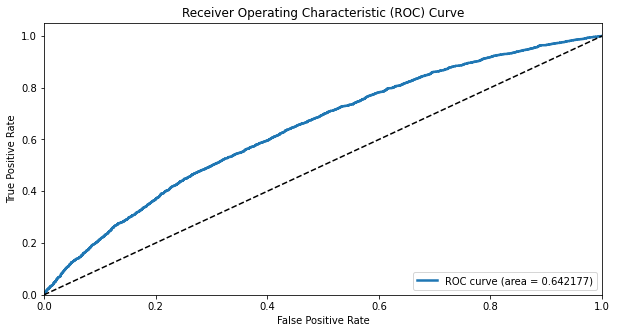

In [10]:
accuracy, precision, recall, f1_score = predict_model.get_performance(y_pred,y_test,labels=[0,1])
roc_auc = predict_model.plot_roc(rforest_randomcv,y_test,X_test)

#### 1.4 - Tunned Random Forest Classifier: Save model


In [27]:
utils.save_data_checkpoint(rforest_randomcv,'../src/models/trained_models/tuned/rforest_hyp.pickle')

Object saved successfully in ../src/models/trained_models/rforest_hyp.pickle with 45.34MB.


-----------------------------------------------
### 2.0 - Tuning a LightGBM Classifier 
-----------------------------------------------

In [11]:
lgbclf = lgb.LGBMClassifier(random_state=42)

#setting timer
start_time = utils.timer(None)

param_grid = {
    'num_leaves':[20,150,300],
    'max_depth':[9,6,3],
    'boosting_type': ['gbdt','dart','goss'],
    'learning_rate':[0.1,0.01,0.001,1],
    'n_estimators':[100,200,300],
    'min_data': [50,70,100],
}

lgbclf_randomcv = RandomizedSearchCV(lgbclf, param_grid, n_iter=50, random_state=42, cv=4,scoring='roc_auc',verbose=5)

lgbclf_randomcv.fit(X_train, y_train)

#use function time based on setting before
utils.timer(start_time)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=70. Current value: min_data_in_leaf=70
[CV 1/4] END boosting_type=goss, learning_rate=0.01, max_depth=6, min_data=70, n_estimators=100, num_leaves=300;, score=0.620 total time=  10.4s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=70. Current value: min_data_in_leaf=70
[CV 2/4] END boosting_type=goss, learning_rate=0.01, max_depth=6, min_data=70, n_estimators=100, num_leaves=300;, score=0.625 total time=   5.3s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=70. Current value: min_data_in_leaf=70
[CV 3/4] END boosting_type=goss, learning_rate=0.01, max_depth=6, min_data=70, n_estimators=100, num_leaves=300;, score=0.616 total time=   7.7s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will 

[CV 1/4] END boosting_type=gbdt, learning_rate=1, max_depth=6, min_data=70, n_estimators=100, num_leaves=150;, score=0.601 total time=   6.7s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=70. Current value: min_data_in_leaf=70
[CV 2/4] END boosting_type=gbdt, learning_rate=1, max_depth=6, min_data=70, n_estimators=100, num_leaves=150;, score=0.606 total time=   3.8s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=70. Current value: min_data_in_leaf=70
[CV 3/4] END boosting_type=gbdt, learning_rate=1, max_depth=6, min_data=70, n_estimators=100, num_leaves=150;, score=0.599 total time=   2.9s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=70. Current value: min_data_in_leaf=70
[CV 4/4] END boosting_type=gbdt, learning_rate=1, max_depth=6, min_data=70, n_estimators=100, num_leaves=150;, score=0.593 total time=   2.7s
[Light

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=70. Current value: min_data_in_leaf=70
[CV 2/4] END boosting_type=goss, learning_rate=0.1, max_depth=3, min_data=70, n_estimators=200, num_leaves=20;, score=0.641 total time=   3.5s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=70. Current value: min_data_in_leaf=70
[CV 3/4] END boosting_type=goss, learning_rate=0.1, max_depth=3, min_data=70, n_estimators=200, num_leaves=20;, score=0.628 total time=   6.6s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=70. Current value: min_data_in_leaf=70
[CV 4/4] END boosting_type=goss, learning_rate=0.1, max_depth=3, min_data=70, n_estimators=200, num_leaves=20;, score=0.636 total time=   4.4s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
[CV

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=70. Current value: min_data_in_leaf=70
[CV 3/4] END boosting_type=gbdt, learning_rate=1, max_depth=3, min_data=70, n_estimators=200, num_leaves=20;, score=0.604 total time=   6.6s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=70. Current value: min_data_in_leaf=70
[CV 4/4] END boosting_type=gbdt, learning_rate=1, max_depth=3, min_data=70, n_estimators=200, num_leaves=20;, score=0.617 total time=  15.3s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
[CV 1/4] END boosting_type=gbdt, learning_rate=0.001, max_depth=9, min_data=50, n_estimators=300, num_leaves=20;, score=0.611 total time=  44.2s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
[CV 2

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=100. Current value: min_data_in_leaf=100
[CV 4/4] END boosting_type=gbdt, learning_rate=0.1, max_depth=9, min_data=100, n_estimators=200, num_leaves=300;, score=0.639 total time=   5.5s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=100. Current value: min_data_in_leaf=100
[CV 1/4] END boosting_type=goss, learning_rate=0.01, max_depth=9, min_data=100, n_estimators=300, num_leaves=300;, score=0.634 total time=   8.2s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=100. Current value: min_data_in_leaf=100
[CV 2/4] END boosting_type=goss, learning_rate=0.01, max_depth=9, min_data=100, n_estimators=300, num_leaves=300;, score=0.638 total time=  11.7s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=100. Current value: min_data

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
[CV 1/4] END boosting_type=gbdt, learning_rate=1, max_depth=9, min_data=50, n_estimators=100, num_leaves=150;, score=0.588 total time=  14.9s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
[CV 2/4] END boosting_type=gbdt, learning_rate=1, max_depth=9, min_data=50, n_estimators=100, num_leaves=150;, score=0.595 total time=   4.1s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
[CV 3/4] END boosting_type=gbdt, learning_rate=1, max_depth=9, min_data=50, n_estimators=100, num_leaves=150;, score=0.579 total time=   9.4s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
[CV 4/

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
[CV 2/4] END boosting_type=goss, learning_rate=0.001, max_depth=6, min_data=50, n_estimators=100, num_leaves=20;, score=0.612 total time=   9.8s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
[CV 3/4] END boosting_type=goss, learning_rate=0.001, max_depth=6, min_data=50, n_estimators=100, num_leaves=20;, score=0.602 total time=   7.6s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
[CV 4/4] END boosting_type=goss, learning_rate=0.001, max_depth=6, min_data=50, n_estimators=100, num_leaves=20;, score=0.616 total time=   8.1s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=70. Current value: min_data_in_leaf=

#### 2.1 LightGBM Classifier: Best hyperparameters with RandomizedsearchCV

In [12]:
print(f'LightGBM Classifier:\n\nBest params:')
for key, values in lgbclf_randomcv.best_params_.items():
  print(f'{key} : {values}')
print(f"\nBest Score: {lgbclf_randomcv.best_score_:.6f}\n")

LightGBM Classifier:

Best params:
num_leaves : 20
n_estimators : 200
min_data : 50
max_depth : 6
learning_rate : 0.1
boosting_type : gbdt

Best Score: 0.643588



#### 2.2 - LightGBM Classifier: Inference time

In [13]:
start_time = utils.timer(None)

y_pred = lgbclf_randomcv.predict(X_test.iloc[0].values.reshape(1,-1))

utils.timer(start_time)

Time taken by function: 0 hours , 0 mins and 0.01849 secs


#### 2.3 - LightGBM Classifier: Performance metrics and classification report

In [14]:
start_time = utils.timer(None)

y_pred = lgbclf_randomcv.predict(X_test)

utils.timer(start_time)

Time taken by function: 0 hours , 0 mins and 0.574068 secs


Model Performance metrics:
------------------------------
Accuracy: 0.7411
Precision: 0.5629139072847682
Recall: 0.0325920245398773
F1 Score: 0.061616527727437476

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      7392
           1       0.56      0.03      0.06      2608

    accuracy                           0.74     10000
   macro avg       0.65      0.51      0.46     10000
weighted avg       0.70      0.74      0.64     10000


Prediction Confusion Matrix:
------------------------------
      0   1
0  7326  66
1  2523  85


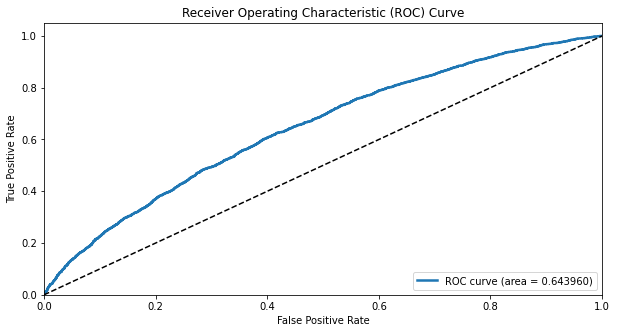

In [15]:
accuracy, precision, recall, f1_score = predict_model.get_performance(y_pred,y_test,labels=[0,1])
roc_auc = predict_model.plot_roc(lgbclf_randomcv,y_test,X_test)

#### 2.4 - LightGBM Classifier: Save model


In [19]:
utils.save_data_checkpoint(lgbclf_randomcv,'../src/models/trained_models/tuned/lgbm_hyp.pickle')

Object saved successfully in ../src/models/trained_models/lgbm_hyp.pickle with 0.45MB.


-----------------------------------------------
### 3.0 - Tuning a XGBClassifier
-----------------------------------------------

In [16]:
xgb_cl = xgb.XGBClassifier(random_state=42)

param_grid = {
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30],
    "gamma": [0.0, 0.8, 0.2 , 0.3, 0.4],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.3,0.6,0.8],
    "colsample_bytree": [0.3, 0.4, 0.5 , 0.7],
}

start_time = utils.timer(None)

xgb_cl_randomcv = RandomizedSearchCV(xgb_cl, param_grid, n_iter=50, random_state=42, cv=4,scoring='roc_auc',verbose=8)

xgb_cl_randomcv.fit(X_train, y_train)

utils.timer(start_time)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV 1/4] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, reg_lambda=0, scale_pos_weight=1, subsample=0.8;, score=0.638 total time= 2.2min
[CV 2/4] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, reg_lambda=0, scale_pos_weight=1, subsample=0.8;, score=0.642 total time= 2.5min
[CV 3/4] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, reg_lambda=0, scale_pos_weight=1, subsample=0.8;, score=0.634 total time= 2.3min
[CV 4/4] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, reg_lambda=0, scale_pos_weight=1, subsample=0.8;, score=0.645 total time= 2.4min
[CV 1/4] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=1, subsample=0.3;, score=0.634 total time= 1.1min
[CV 2/4] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=1, subsample=0.3;, score=0.637 tot

[CV 4/4] END colsample_bytree=0.5, gamma=0.8, learning_rate=0.05, max_depth=12, reg_lambda=0, scale_pos_weight=3, subsample=0.8;, score=0.635 total time= 2.4min
[CV 1/4] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=8, reg_lambda=10, scale_pos_weight=3, subsample=0.8;, score=0.640 total time= 1.6min
[CV 2/4] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=8, reg_lambda=10, scale_pos_weight=3, subsample=0.8;, score=0.643 total time= 1.3min
[CV 3/4] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=8, reg_lambda=10, scale_pos_weight=3, subsample=0.8;, score=0.634 total time= 1.4min
[CV 4/4] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=8, reg_lambda=10, scale_pos_weight=3, subsample=0.8;, score=0.638 total time= 1.4min
[CV 1/4] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, reg_lambda=1, scale_pos_weight=3, subsample=0.3;, score=0.635 total time=  41.4s
[CV 2/4] END colsample_bytree=0.5, 

[CV 4/4] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=8, reg_lambda=0, scale_pos_weight=3, subsample=0.8;, score=0.639 total time= 1.5min
[CV 1/4] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=8, reg_lambda=10, scale_pos_weight=5, subsample=0.3;, score=0.618 total time=  49.7s
[CV 2/4] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=8, reg_lambda=10, scale_pos_weight=5, subsample=0.3;, score=0.623 total time=  50.1s
[CV 3/4] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=8, reg_lambda=10, scale_pos_weight=5, subsample=0.3;, score=0.610 total time=  50.6s
[CV 4/4] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=8, reg_lambda=10, scale_pos_weight=5, subsample=0.3;, score=0.616 total time=  47.6s
[CV 1/4] END colsample_bytree=0.4, gamma=0.8, learning_rate=0.25, max_depth=3, reg_lambda=10, scale_pos_weight=5, subsample=0.8;, score=0.643 total time=  42.5s
[CV 2/4] END colsample_bytree=0.4, gamma

[CV 4/4] END colsample_bytree=0.3, gamma=0.8, learning_rate=0.15, max_depth=12, reg_lambda=1, scale_pos_weight=1, subsample=0.3;, score=0.623 total time= 1.4min
[CV 1/4] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=10, reg_lambda=0, scale_pos_weight=5, subsample=0.6;, score=0.624 total time= 2.6min
[CV 2/4] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=10, reg_lambda=0, scale_pos_weight=5, subsample=0.6;, score=0.616 total time= 2.7min
[CV 3/4] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=10, reg_lambda=0, scale_pos_weight=5, subsample=0.6;, score=0.612 total time= 3.2min
[CV 4/4] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=10, reg_lambda=0, scale_pos_weight=5, subsample=0.6;, score=0.621 total time= 3.0min
[CV 1/4] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=12, reg_lambda=10, scale_pos_weight=5, subsample=0.6;, score=0.615 total time= 1.8min
[CV 2/4] END colsample_bytree=0.3, gam

#### 3.1 - XGBoost Classifier: Best hyperparameters with RandomizedsearchCV 

In [17]:
print(f'XGBoost Classifier:\n\nBest params:')
for key, values in xgb_cl_randomcv.best_params_.items():
  print(f'{key} : {values}')
print(f"\nBest Score: {xgb_cl_randomcv.best_score_:.6f}\n")

XGBoost Classifier:

Best params:
subsample : 0.8
scale_pos_weight : 5
reg_lambda : 10
max_depth : 3
learning_rate : 0.25
gamma : 0.8
colsample_bytree : 0.4

Best Score: 0.642581



#### 3.2 - XGBoost Classifier: Inference time

In [18]:
start_time = utils.timer(None)

y_pred = xgb_cl_randomcv.predict(X_test.iloc[0].values.reshape(1,-1))

utils.timer(start_time)

Time taken by function: 0 hours , 0 mins and 0.023262 secs


#### 3.3 - XGBoost Classifier: Performance metrics and classification report

In [19]:
start_time = utils.timer(None)

y_pred = xgb_cl_randomcv.predict(X_test)

utils.timer(start_time)

Time taken by function: 0 hours , 0 mins and 0.410113 secs


Model Performance metrics:
------------------------------
Accuracy: 0.395
Precision: 0.2902242808386153
Recall: 0.9129601226993865
F1 Score: 0.4404365519792823

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.87      0.21      0.34      7392
           1       0.29      0.91      0.44      2608

    accuracy                           0.40     10000
   macro avg       0.58      0.56      0.39     10000
weighted avg       0.72      0.40      0.37     10000


Prediction Confusion Matrix:
------------------------------
      0     1
0  1569  5823
1   227  2381


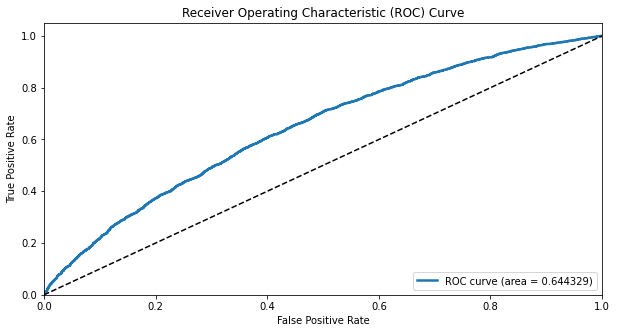

In [20]:
accuracy, precision, recall, f1_score = predict_model.get_performance(y_pred,y_test,labels=[0,1])
roc_auc = predict_model.plot_roc(xgb_cl_randomcv,y_test,X_test)

#### 3.4 - XGBoost Classifier: Save model


In [13]:
utils.save_data_checkpoint(xgb_cl_randomcv,'../src/models/trained_models/tuned/xgb_hyp.pickle')

Object saved successfully in ../src/models/trained_models/xgb_hyp.pickle with 0.42MB.


-----------------------------------------------
### 4.0 - Tuning a CatBoost Classifier
-----------------------------------------------

In [21]:
cbc = CatBoostClassifier(random_state=42)

parameters = {
    'depth': [4,5,6,7,8,9, 10],
    'learning_rate': [0.01,0.02,0.03,0.04],
    'iterations': [10, 20,30,40,50,60,70,80,90,100]
}

start_time = utils.timer(None)

cbc_randomcv = RandomizedSearchCV(cbc, parameters, n_iter=50, random_state=42, cv=4,scoring='roc_auc',verbose=8)
cbc_randomcv.fit(X_train, y_train)

utils.timer(start_time)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
0:	learn: 0.6881249	total: 91.6ms	remaining: 8.15s
1:	learn: 0.6830718	total: 104ms	remaining: 4.57s
2:	learn: 0.6779931	total: 118ms	remaining: 3.42s
3:	learn: 0.6734974	total: 131ms	remaining: 2.81s
4:	learn: 0.6688797	total: 145ms	remaining: 2.47s
5:	learn: 0.6648961	total: 165ms	remaining: 2.31s
6:	learn: 0.6608493	total: 180ms	remaining: 2.13s
7:	learn: 0.6569957	total: 194ms	remaining: 1.99s
8:	learn: 0.6532129	total: 207ms	remaining: 1.86s
9:	learn: 0.6496052	total: 220ms	remaining: 1.76s
10:	learn: 0.6460069	total: 232ms	remaining: 1.67s
11:	learn: 0.6427031	total: 244ms	remaining: 1.59s
12:	learn: 0.6393061	total: 256ms	remaining: 1.51s
13:	learn: 0.6363893	total: 271ms	remaining: 1.47s
14:	learn: 0.6336857	total: 286ms	remaining: 1.43s
15:	learn: 0.6309856	total: 305ms	remaining: 1.41s
16:	learn: 0.6282654	total: 320ms	remaining: 1.37s
17:	learn: 0.6257549	total: 337ms	remaining: 1.35s
18:	learn: 0.6231526	total: 3

71:	learn: 0.5692717	total: 729ms	remaining: 182ms
72:	learn: 0.5689882	total: 742ms	remaining: 173ms
73:	learn: 0.5687265	total: 754ms	remaining: 163ms
74:	learn: 0.5683484	total: 766ms	remaining: 153ms
75:	learn: 0.5681047	total: 776ms	remaining: 143ms
76:	learn: 0.5678148	total: 788ms	remaining: 133ms
77:	learn: 0.5674949	total: 798ms	remaining: 123ms
78:	learn: 0.5672019	total: 807ms	remaining: 112ms
79:	learn: 0.5669514	total: 816ms	remaining: 102ms
80:	learn: 0.5666174	total: 825ms	remaining: 91.7ms
81:	learn: 0.5663861	total: 835ms	remaining: 81.4ms
82:	learn: 0.5661925	total: 843ms	remaining: 71.1ms
83:	learn: 0.5659678	total: 853ms	remaining: 60.9ms
84:	learn: 0.5658090	total: 862ms	remaining: 50.7ms
85:	learn: 0.5655094	total: 871ms	remaining: 40.5ms
86:	learn: 0.5652032	total: 881ms	remaining: 30.4ms
87:	learn: 0.5649432	total: 892ms	remaining: 20.3ms
88:	learn: 0.5647641	total: 901ms	remaining: 10.1ms
89:	learn: 0.5645191	total: 911ms	remaining: 0us
[CV 2/4] END depth=4, it

49:	learn: 0.5806451	total: 550ms	remaining: 440ms
50:	learn: 0.5798097	total: 563ms	remaining: 430ms
51:	learn: 0.5789875	total: 578ms	remaining: 422ms
52:	learn: 0.5783042	total: 589ms	remaining: 411ms
53:	learn: 0.5776495	total: 598ms	remaining: 399ms
54:	learn: 0.5769625	total: 608ms	remaining: 387ms
55:	learn: 0.5763957	total: 619ms	remaining: 376ms
56:	learn: 0.5758029	total: 629ms	remaining: 364ms
57:	learn: 0.5751864	total: 642ms	remaining: 354ms
58:	learn: 0.5747186	total: 652ms	remaining: 343ms
59:	learn: 0.5742394	total: 662ms	remaining: 331ms
60:	learn: 0.5737195	total: 675ms	remaining: 321ms
61:	learn: 0.5732847	total: 685ms	remaining: 309ms
62:	learn: 0.5729135	total: 695ms	remaining: 298ms
63:	learn: 0.5724937	total: 705ms	remaining: 286ms
64:	learn: 0.5719124	total: 715ms	remaining: 275ms
65:	learn: 0.5715138	total: 725ms	remaining: 264ms
66:	learn: 0.5710769	total: 739ms	remaining: 254ms
67:	learn: 0.5706297	total: 750ms	remaining: 243ms
68:	learn: 0.5702339	total: 760

38:	learn: 0.6212163	total: 584ms	remaining: 614ms
39:	learn: 0.6200068	total: 603ms	remaining: 603ms
40:	learn: 0.6188335	total: 619ms	remaining: 589ms
41:	learn: 0.6175978	total: 635ms	remaining: 575ms
42:	learn: 0.6165144	total: 651ms	remaining: 561ms
43:	learn: 0.6154464	total: 666ms	remaining: 545ms
44:	learn: 0.6142887	total: 680ms	remaining: 529ms
45:	learn: 0.6131698	total: 695ms	remaining: 514ms
46:	learn: 0.6121401	total: 709ms	remaining: 498ms
47:	learn: 0.6111616	total: 725ms	remaining: 483ms
48:	learn: 0.6102225	total: 739ms	remaining: 468ms
49:	learn: 0.6092122	total: 753ms	remaining: 452ms
50:	learn: 0.6082223	total: 768ms	remaining: 436ms
51:	learn: 0.6073204	total: 786ms	remaining: 423ms
52:	learn: 0.6062811	total: 801ms	remaining: 408ms
53:	learn: 0.6053735	total: 815ms	remaining: 392ms
54:	learn: 0.6045114	total: 830ms	remaining: 377ms
55:	learn: 0.6036408	total: 844ms	remaining: 362ms
56:	learn: 0.6028275	total: 858ms	remaining: 346ms
57:	learn: 0.6020401	total: 871

40:	learn: 0.6183613	total: 590ms	remaining: 561ms
41:	learn: 0.6172697	total: 609ms	remaining: 551ms
42:	learn: 0.6162076	total: 623ms	remaining: 536ms
43:	learn: 0.6152198	total: 637ms	remaining: 521ms
44:	learn: 0.6141732	total: 654ms	remaining: 509ms
45:	learn: 0.6131813	total: 669ms	remaining: 495ms
46:	learn: 0.6121700	total: 684ms	remaining: 480ms
47:	learn: 0.6110456	total: 698ms	remaining: 465ms
48:	learn: 0.6100088	total: 712ms	remaining: 450ms
49:	learn: 0.6090518	total: 726ms	remaining: 436ms
50:	learn: 0.6081229	total: 740ms	remaining: 421ms
51:	learn: 0.6071431	total: 755ms	remaining: 407ms
52:	learn: 0.6061605	total: 771ms	remaining: 393ms
53:	learn: 0.6052813	total: 788ms	remaining: 379ms
54:	learn: 0.6043100	total: 804ms	remaining: 365ms
55:	learn: 0.6033801	total: 819ms	remaining: 351ms
56:	learn: 0.6025526	total: 836ms	remaining: 337ms
57:	learn: 0.6017397	total: 851ms	remaining: 323ms
58:	learn: 0.6008692	total: 867ms	remaining: 309ms
59:	learn: 0.6000396	total: 881

22:	learn: 0.5783767	total: 1.85s	remaining: 2.17s
23:	learn: 0.5765262	total: 1.94s	remaining: 2.1s
24:	learn: 0.5746740	total: 2.02s	remaining: 2.02s
25:	learn: 0.5730718	total: 2.11s	remaining: 1.95s
26:	learn: 0.5715278	total: 2.19s	remaining: 1.87s
27:	learn: 0.5703304	total: 2.28s	remaining: 1.79s
28:	learn: 0.5688253	total: 2.37s	remaining: 1.72s
29:	learn: 0.5673937	total: 2.46s	remaining: 1.64s
30:	learn: 0.5661565	total: 2.55s	remaining: 1.56s
31:	learn: 0.5646560	total: 2.64s	remaining: 1.49s
32:	learn: 0.5636583	total: 2.72s	remaining: 1.4s
33:	learn: 0.5626784	total: 2.81s	remaining: 1.32s
34:	learn: 0.5619375	total: 2.9s	remaining: 1.25s
35:	learn: 0.5611476	total: 2.99s	remaining: 1.16s
36:	learn: 0.5599402	total: 3.08s	remaining: 1.08s
37:	learn: 0.5589398	total: 3.18s	remaining: 1s
38:	learn: 0.5582056	total: 3.26s	remaining: 920ms
39:	learn: 0.5576815	total: 3.34s	remaining: 836ms
40:	learn: 0.5564505	total: 3.44s	remaining: 755ms
41:	learn: 0.5557603	total: 3.52s	rem

30:	learn: 0.5791196	total: 616ms	remaining: 1.17s
31:	learn: 0.5777702	total: 640ms	remaining: 1.16s
32:	learn: 0.5767875	total: 661ms	remaining: 1.14s
33:	learn: 0.5756496	total: 681ms	remaining: 1.12s
34:	learn: 0.5746649	total: 699ms	remaining: 1.1s
35:	learn: 0.5735484	total: 720ms	remaining: 1.08s
36:	learn: 0.5727656	total: 740ms	remaining: 1.06s
37:	learn: 0.5717810	total: 759ms	remaining: 1.04s
38:	learn: 0.5711469	total: 777ms	remaining: 1.01s
39:	learn: 0.5703831	total: 796ms	remaining: 995ms
40:	learn: 0.5695007	total: 822ms	remaining: 983ms
41:	learn: 0.5688564	total: 846ms	remaining: 966ms
42:	learn: 0.5678593	total: 866ms	remaining: 946ms
43:	learn: 0.5673144	total: 886ms	remaining: 926ms
44:	learn: 0.5666620	total: 906ms	remaining: 906ms
45:	learn: 0.5660841	total: 925ms	remaining: 885ms
46:	learn: 0.5655436	total: 946ms	remaining: 866ms
47:	learn: 0.5648356	total: 966ms	remaining: 845ms
48:	learn: 0.5641065	total: 986ms	remaining: 825ms
49:	learn: 0.5636720	total: 1.01

11:	learn: 0.6243070	total: 193ms	remaining: 1.25s
12:	learn: 0.6206434	total: 218ms	remaining: 1.29s
13:	learn: 0.6171814	total: 238ms	remaining: 1.29s
14:	learn: 0.6135847	total: 258ms	remaining: 1.29s
15:	learn: 0.6102349	total: 277ms	remaining: 1.28s
16:	learn: 0.6074602	total: 294ms	remaining: 1.26s
17:	learn: 0.6046188	total: 315ms	remaining: 1.26s
18:	learn: 0.6017706	total: 337ms	remaining: 1.26s
19:	learn: 0.5995266	total: 356ms	remaining: 1.25s
20:	learn: 0.5968870	total: 377ms	remaining: 1.24s
21:	learn: 0.5946694	total: 401ms	remaining: 1.24s
22:	learn: 0.5928028	total: 422ms	remaining: 1.23s
23:	learn: 0.5907147	total: 436ms	remaining: 1.2s
24:	learn: 0.5891690	total: 446ms	remaining: 1.16s
25:	learn: 0.5876985	total: 464ms	remaining: 1.14s
26:	learn: 0.5862645	total: 482ms	remaining: 1.12s
27:	learn: 0.5844563	total: 501ms	remaining: 1.11s
28:	learn: 0.5829962	total: 520ms	remaining: 1.09s
29:	learn: 0.5813349	total: 541ms	remaining: 1.08s
30:	learn: 0.5801166	total: 561m

82:	learn: 0.5551019	total: 1.66s	remaining: 140ms
83:	learn: 0.5549698	total: 1.68s	remaining: 120ms
84:	learn: 0.5547750	total: 1.7s	remaining: 99.9ms
85:	learn: 0.5546020	total: 1.72s	remaining: 79.9ms
86:	learn: 0.5544141	total: 1.74s	remaining: 59.9ms
87:	learn: 0.5542091	total: 1.76s	remaining: 39.9ms
88:	learn: 0.5540333	total: 1.78s	remaining: 20ms
89:	learn: 0.5538877	total: 1.8s	remaining: 0us
[CV 4/4] END depth=7, iterations=90, learning_rate=0.03;, score=0.629 total time=   3.2s
0:	learn: 0.6881249	total: 8.31ms	remaining: 241ms
1:	learn: 0.6830718	total: 17.4ms	remaining: 244ms
2:	learn: 0.6779931	total: 27.7ms	remaining: 249ms
3:	learn: 0.6734974	total: 36.8ms	remaining: 239ms
4:	learn: 0.6688797	total: 45.6ms	remaining: 228ms
5:	learn: 0.6648961	total: 54ms	remaining: 216ms
6:	learn: 0.6608493	total: 62.9ms	remaining: 207ms
7:	learn: 0.6569957	total: 71.8ms	remaining: 198ms
8:	learn: 0.6532129	total: 80.7ms	remaining: 188ms
9:	learn: 0.6496052	total: 89.6ms	remaining: 17

31:	learn: 0.5777702	total: 600ms	remaining: 713ms
32:	learn: 0.5767875	total: 624ms	remaining: 699ms
33:	learn: 0.5756496	total: 646ms	remaining: 684ms
34:	learn: 0.5746649	total: 665ms	remaining: 665ms
35:	learn: 0.5735484	total: 686ms	remaining: 647ms
36:	learn: 0.5727656	total: 704ms	remaining: 628ms
37:	learn: 0.5717810	total: 724ms	remaining: 609ms
38:	learn: 0.5711469	total: 741ms	remaining: 589ms
39:	learn: 0.5703831	total: 761ms	remaining: 571ms
40:	learn: 0.5695007	total: 780ms	remaining: 552ms
41:	learn: 0.5688564	total: 803ms	remaining: 535ms
42:	learn: 0.5678593	total: 826ms	remaining: 519ms
43:	learn: 0.5673144	total: 845ms	remaining: 499ms
44:	learn: 0.5666620	total: 867ms	remaining: 482ms
45:	learn: 0.5660841	total: 888ms	remaining: 463ms
46:	learn: 0.5655436	total: 909ms	remaining: 445ms
47:	learn: 0.5648356	total: 932ms	remaining: 427ms
48:	learn: 0.5641065	total: 956ms	remaining: 410ms
49:	learn: 0.5636720	total: 975ms	remaining: 390ms
50:	learn: 0.5632424	total: 1s	

50:	learn: 0.5640759	total: 1.22s	remaining: 456ms
51:	learn: 0.5636392	total: 1.25s	remaining: 433ms
52:	learn: 0.5632665	total: 1.27s	remaining: 409ms
53:	learn: 0.5628613	total: 1.3s	remaining: 385ms
54:	learn: 0.5624024	total: 1.33s	remaining: 362ms
55:	learn: 0.5620801	total: 1.35s	remaining: 338ms
56:	learn: 0.5616800	total: 1.38s	remaining: 315ms
57:	learn: 0.5612781	total: 1.41s	remaining: 291ms
58:	learn: 0.5608912	total: 1.43s	remaining: 267ms
59:	learn: 0.5604886	total: 1.46s	remaining: 243ms
60:	learn: 0.5601343	total: 1.48s	remaining: 219ms
61:	learn: 0.5598147	total: 1.51s	remaining: 195ms
62:	learn: 0.5594166	total: 1.53s	remaining: 170ms
63:	learn: 0.5591874	total: 1.56s	remaining: 146ms
64:	learn: 0.5589321	total: 1.58s	remaining: 122ms
65:	learn: 0.5586604	total: 1.61s	remaining: 97.6ms
66:	learn: 0.5583503	total: 1.64s	remaining: 73.4ms
67:	learn: 0.5581113	total: 1.67s	remaining: 49ms
68:	learn: 0.5578151	total: 1.69s	remaining: 24.5ms
69:	learn: 0.5576485	total: 1.

28:	learn: 0.6333933	total: 590ms	remaining: 834ms
29:	learn: 0.6318534	total: 614ms	remaining: 819ms
30:	learn: 0.6303242	total: 634ms	remaining: 798ms
31:	learn: 0.6288156	total: 654ms	remaining: 777ms
32:	learn: 0.6275256	total: 672ms	remaining: 753ms
33:	learn: 0.6261945	total: 714ms	remaining: 756ms
34:	learn: 0.6249244	total: 732ms	remaining: 732ms
35:	learn: 0.6235427	total: 753ms	remaining: 711ms
36:	learn: 0.6223617	total: 772ms	remaining: 689ms
37:	learn: 0.6210670	total: 800ms	remaining: 674ms
38:	learn: 0.6199696	total: 818ms	remaining: 650ms
39:	learn: 0.6187813	total: 837ms	remaining: 628ms
40:	learn: 0.6176529	total: 855ms	remaining: 605ms
41:	learn: 0.6165394	total: 873ms	remaining: 582ms
42:	learn: 0.6153566	total: 892ms	remaining: 560ms
43:	learn: 0.6143407	total: 910ms	remaining: 538ms
44:	learn: 0.6133121	total: 928ms	remaining: 515ms
45:	learn: 0.6122905	total: 946ms	remaining: 494ms
46:	learn: 0.6112914	total: 964ms	remaining: 472ms
47:	learn: 0.6101784	total: 982

52:	learn: 0.6051946	total: 1.01s	remaining: 323ms
53:	learn: 0.6042199	total: 1.03s	remaining: 305ms
54:	learn: 0.6033790	total: 1.05s	remaining: 286ms
55:	learn: 0.6026126	total: 1.07s	remaining: 268ms
56:	learn: 0.6018040	total: 1.09s	remaining: 248ms
57:	learn: 0.6010469	total: 1.11s	remaining: 229ms
58:	learn: 0.6002185	total: 1.13s	remaining: 210ms
59:	learn: 0.5994356	total: 1.15s	remaining: 191ms
60:	learn: 0.5986617	total: 1.16s	remaining: 172ms
61:	learn: 0.5978682	total: 1.19s	remaining: 153ms
62:	learn: 0.5970580	total: 1.21s	remaining: 134ms
63:	learn: 0.5962522	total: 1.23s	remaining: 115ms
64:	learn: 0.5954471	total: 1.25s	remaining: 96.1ms
65:	learn: 0.5946764	total: 1.27s	remaining: 76.9ms
66:	learn: 0.5938840	total: 1.29s	remaining: 57.8ms
67:	learn: 0.5932019	total: 1.31s	remaining: 38.6ms
68:	learn: 0.5925791	total: 1.33s	remaining: 19.3ms
69:	learn: 0.5918608	total: 1.35s	remaining: 0us
[CV 3/4] END depth=7, iterations=70, learning_rate=0.01;, score=0.603 total tim

70:	learn: 0.5516086	total: 1.39s	remaining: 373ms
71:	learn: 0.5514324	total: 1.42s	remaining: 355ms
72:	learn: 0.5512353	total: 1.44s	remaining: 335ms
73:	learn: 0.5509906	total: 1.46s	remaining: 316ms
74:	learn: 0.5508051	total: 1.48s	remaining: 296ms
75:	learn: 0.5505191	total: 1.5s	remaining: 276ms
76:	learn: 0.5503793	total: 1.52s	remaining: 256ms
77:	learn: 0.5502406	total: 1.53s	remaining: 236ms
78:	learn: 0.5501232	total: 1.55s	remaining: 216ms
79:	learn: 0.5499752	total: 1.57s	remaining: 196ms
80:	learn: 0.5497752	total: 1.6s	remaining: 177ms
81:	learn: 0.5495840	total: 1.62s	remaining: 158ms
82:	learn: 0.5494878	total: 1.64s	remaining: 138ms
83:	learn: 0.5493180	total: 1.66s	remaining: 118ms
84:	learn: 0.5492165	total: 1.67s	remaining: 98.5ms
85:	learn: 0.5491044	total: 1.69s	remaining: 78.7ms
86:	learn: 0.5489685	total: 1.71s	remaining: 59ms
87:	learn: 0.5488307	total: 1.73s	remaining: 39.3ms
88:	learn: 0.5486908	total: 1.75s	remaining: 19.7ms
89:	learn: 0.5485410	total: 1.

51:	learn: 0.5574380	total: 981ms	remaining: 717ms
52:	learn: 0.5570133	total: 1s	remaining: 701ms
53:	learn: 0.5568352	total: 1.02s	remaining: 682ms
54:	learn: 0.5564933	total: 1.04s	remaining: 664ms
55:	learn: 0.5562488	total: 1.06s	remaining: 645ms
56:	learn: 0.5558513	total: 1.08s	remaining: 626ms
57:	learn: 0.5556135	total: 1.1s	remaining: 607ms
58:	learn: 0.5553049	total: 1.12s	remaining: 588ms
59:	learn: 0.5550789	total: 1.14s	remaining: 570ms
60:	learn: 0.5549044	total: 1.16s	remaining: 550ms
61:	learn: 0.5545291	total: 1.18s	remaining: 533ms
62:	learn: 0.5542017	total: 1.2s	remaining: 516ms
63:	learn: 0.5539831	total: 1.22s	remaining: 497ms
64:	learn: 0.5535923	total: 1.25s	remaining: 479ms
65:	learn: 0.5533445	total: 1.27s	remaining: 461ms
66:	learn: 0.5530834	total: 1.29s	remaining: 442ms
67:	learn: 0.5529493	total: 1.3s	remaining: 422ms
68:	learn: 0.5527593	total: 1.32s	remaining: 403ms
69:	learn: 0.5524700	total: 1.34s	remaining: 384ms
70:	learn: 0.5523178	total: 1.36s	rem

29:	learn: 0.5977902	total: 1.79s	remaining: 1.79s
30:	learn: 0.5963660	total: 1.85s	remaining: 1.73s
31:	learn: 0.5947497	total: 1.92s	remaining: 1.68s
32:	learn: 0.5935109	total: 1.93s	remaining: 1.58s
33:	learn: 0.5920311	total: 2s	remaining: 1.53s
34:	learn: 0.5906397	total: 2.06s	remaining: 1.47s
35:	learn: 0.5893884	total: 2.12s	remaining: 1.41s
36:	learn: 0.5881594	total: 2.18s	remaining: 1.35s
37:	learn: 0.5870728	total: 2.24s	remaining: 1.3s
38:	learn: 0.5859473	total: 2.31s	remaining: 1.24s
39:	learn: 0.5846267	total: 2.37s	remaining: 1.19s
40:	learn: 0.5834544	total: 2.44s	remaining: 1.13s
41:	learn: 0.5820853	total: 2.5s	remaining: 1.07s
42:	learn: 0.5810599	total: 2.57s	remaining: 1.02s
43:	learn: 0.5800125	total: 2.63s	remaining: 955ms
44:	learn: 0.5788792	total: 2.69s	remaining: 896ms
45:	learn: 0.5778284	total: 2.76s	remaining: 840ms
46:	learn: 0.5767685	total: 2.82s	remaining: 781ms
47:	learn: 0.5759513	total: 2.88s	remaining: 721ms
48:	learn: 0.5751083	total: 2.94s	re

8:	learn: 0.6518538	total: 556ms	remaining: 3.15s
9:	learn: 0.6481047	total: 613ms	remaining: 3.06s
10:	learn: 0.6445876	total: 675ms	remaining: 3.01s
11:	learn: 0.6409946	total: 742ms	remaining: 2.97s
12:	learn: 0.6377977	total: 808ms	remaining: 2.92s
13:	learn: 0.6344555	total: 868ms	remaining: 2.85s
14:	learn: 0.6314000	total: 929ms	remaining: 2.79s
15:	learn: 0.6282237	total: 994ms	remaining: 2.73s
16:	learn: 0.6255408	total: 1.05s	remaining: 2.67s
17:	learn: 0.6230505	total: 1.11s	remaining: 2.6s
18:	learn: 0.6205775	total: 1.18s	remaining: 2.54s
19:	learn: 0.6180076	total: 1.24s	remaining: 2.48s
20:	learn: 0.6159070	total: 1.28s	remaining: 2.38s
21:	learn: 0.6136847	total: 1.35s	remaining: 2.33s
22:	learn: 0.6115394	total: 1.41s	remaining: 2.27s
23:	learn: 0.6094849	total: 1.47s	remaining: 2.21s
24:	learn: 0.6074750	total: 1.54s	remaining: 2.16s
25:	learn: 0.6055790	total: 1.6s	remaining: 2.1s
26:	learn: 0.6037230	total: 1.67s	remaining: 2.04s
27:	learn: 0.6016204	total: 1.75s	re

24:	learn: 0.6404750	total: 382ms	remaining: 229ms
25:	learn: 0.6388936	total: 401ms	remaining: 216ms
26:	learn: 0.6374566	total: 415ms	remaining: 200ms
27:	learn: 0.6359332	total: 431ms	remaining: 185ms
28:	learn: 0.6345553	total: 447ms	remaining: 170ms
29:	learn: 0.6329655	total: 462ms	remaining: 154ms
30:	learn: 0.6314769	total: 477ms	remaining: 138ms
31:	learn: 0.6300920	total: 491ms	remaining: 123ms
32:	learn: 0.6286729	total: 507ms	remaining: 107ms
33:	learn: 0.6274445	total: 520ms	remaining: 91.8ms
34:	learn: 0.6260786	total: 535ms	remaining: 76.5ms
35:	learn: 0.6246793	total: 550ms	remaining: 61.1ms
36:	learn: 0.6234519	total: 564ms	remaining: 45.7ms
37:	learn: 0.6223008	total: 581ms	remaining: 30.6ms
38:	learn: 0.6209909	total: 594ms	remaining: 15.2ms
39:	learn: 0.6197966	total: 613ms	remaining: 0us
[CV 3/4] END depth=6, iterations=40, learning_rate=0.01;, score=0.596 total time=   2.1s
0:	learn: 0.6904927	total: 16.1ms	remaining: 627ms
1:	learn: 0.6879135	total: 35.3ms	remain

44:	learn: 0.5645024	total: 2.65s	remaining: 884ms
45:	learn: 0.5637685	total: 2.71s	remaining: 826ms
46:	learn: 0.5632007	total: 2.77s	remaining: 767ms
47:	learn: 0.5624793	total: 2.84s	remaining: 710ms
48:	learn: 0.5621585	total: 2.85s	remaining: 641ms
49:	learn: 0.5617560	total: 2.92s	remaining: 585ms
50:	learn: 0.5613468	total: 2.98s	remaining: 526ms
51:	learn: 0.5608119	total: 3.04s	remaining: 468ms
52:	learn: 0.5603524	total: 3.1s	remaining: 410ms
53:	learn: 0.5598736	total: 3.16s	remaining: 352ms
54:	learn: 0.5593907	total: 3.22s	remaining: 293ms
55:	learn: 0.5588010	total: 3.29s	remaining: 235ms
56:	learn: 0.5583753	total: 3.36s	remaining: 177ms
57:	learn: 0.5579572	total: 3.42s	remaining: 118ms
58:	learn: 0.5575946	total: 3.48s	remaining: 59.1ms
59:	learn: 0.5572139	total: 3.54s	remaining: 0us
[CV 2/4] END depth=9, iterations=60, learning_rate=0.03;, score=0.628 total time=   4.7s
0:	learn: 0.6857592	total: 14.6ms	remaining: 859ms
1:	learn: 0.6777230	total: 76.1ms	remaining: 2

23:	learn: 0.6090425	total: 1.5s	remaining: 375ms
24:	learn: 0.6069133	total: 1.56s	remaining: 312ms
25:	learn: 0.6051681	total: 1.62s	remaining: 249ms
26:	learn: 0.6032156	total: 1.68s	remaining: 187ms
27:	learn: 0.6012906	total: 1.75s	remaining: 125ms
28:	learn: 0.5995754	total: 1.76s	remaining: 60.8ms
29:	learn: 0.5977902	total: 1.82s	remaining: 0us
[CV 1/4] END depth=9, iterations=30, learning_rate=0.02;, score=0.611 total time=   3.0s
0:	learn: 0.6877933	total: 62.7ms	remaining: 1.82s
1:	learn: 0.6827501	total: 122ms	remaining: 1.7s
2:	learn: 0.6778719	total: 178ms	remaining: 1.6s
3:	learn: 0.6728773	total: 234ms	remaining: 1.52s
4:	learn: 0.6686366	total: 256ms	remaining: 1.28s
5:	learn: 0.6643923	total: 316ms	remaining: 1.26s
6:	learn: 0.6603639	total: 348ms	remaining: 1.14s
7:	learn: 0.6559259	total: 412ms	remaining: 1.13s
8:	learn: 0.6519159	total: 469ms	remaining: 1.09s
9:	learn: 0.6480432	total: 538ms	remaining: 1.08s
10:	learn: 0.6448287	total: 556ms	remaining: 960ms
11:	le

12:	learn: 0.6186702	total: 790ms	remaining: 1.03s
13:	learn: 0.6151944	total: 850ms	remaining: 971ms
14:	learn: 0.6119181	total: 906ms	remaining: 906ms
15:	learn: 0.6085611	total: 963ms	remaining: 843ms
16:	learn: 0.6055115	total: 1.03s	remaining: 789ms
17:	learn: 0.6027625	total: 1.09s	remaining: 728ms
18:	learn: 0.5999590	total: 1.15s	remaining: 667ms
19:	learn: 0.5973802	total: 1.21s	remaining: 604ms
20:	learn: 0.5946663	total: 1.27s	remaining: 546ms
21:	learn: 0.5925316	total: 1.33s	remaining: 486ms
22:	learn: 0.5901521	total: 1.4s	remaining: 425ms
23:	learn: 0.5880588	total: 1.46s	remaining: 366ms
24:	learn: 0.5860482	total: 1.53s	remaining: 305ms
25:	learn: 0.5845066	total: 1.59s	remaining: 245ms
26:	learn: 0.5828506	total: 1.66s	remaining: 185ms
27:	learn: 0.5811904	total: 1.73s	remaining: 123ms
28:	learn: 0.5795539	total: 1.79s	remaining: 61.7ms
29:	learn: 0.5782672	total: 1.85s	remaining: 0us
[CV 1/4] END depth=9, iterations=30, learning_rate=0.03;, score=0.614 total time=   

61:	learn: 0.5621778	total: 744ms	remaining: 96ms
62:	learn: 0.5619532	total: 758ms	remaining: 84.3ms
63:	learn: 0.5616957	total: 771ms	remaining: 72.3ms
64:	learn: 0.5614390	total: 782ms	remaining: 60.2ms
65:	learn: 0.5611444	total: 794ms	remaining: 48.1ms
66:	learn: 0.5608805	total: 806ms	remaining: 36.1ms
67:	learn: 0.5606383	total: 818ms	remaining: 24.1ms
68:	learn: 0.5604515	total: 831ms	remaining: 12ms
69:	learn: 0.5602692	total: 843ms	remaining: 0us
[CV 1/4] END depth=5, iterations=70, learning_rate=0.03;, score=0.613 total time=   2.2s
0:	learn: 0.6854382	total: 10.5ms	remaining: 723ms
1:	learn: 0.6783229	total: 21.1ms	remaining: 718ms
2:	learn: 0.6714429	total: 33.5ms	remaining: 749ms
3:	learn: 0.6646520	total: 44.9ms	remaining: 741ms
4:	learn: 0.6586897	total: 55.1ms	remaining: 716ms
5:	learn: 0.6526838	total: 66ms	remaining: 704ms
6:	learn: 0.6474149	total: 76.2ms	remaining: 686ms
7:	learn: 0.6426358	total: 86.6ms	remaining: 671ms
8:	learn: 0.6379533	total: 97.8ms	remaining:

16:	learn: 0.6091116	total: 197ms	remaining: 614ms
17:	learn: 0.6063855	total: 212ms	remaining: 613ms
18:	learn: 0.6037300	total: 225ms	remaining: 603ms
19:	learn: 0.6014422	total: 235ms	remaining: 588ms
20:	learn: 0.5991488	total: 246ms	remaining: 575ms
21:	learn: 0.5972436	total: 257ms	remaining: 562ms
22:	learn: 0.5954380	total: 269ms	remaining: 550ms
23:	learn: 0.5932658	total: 282ms	remaining: 541ms
24:	learn: 0.5915741	total: 293ms	remaining: 528ms
25:	learn: 0.5900740	total: 304ms	remaining: 514ms
26:	learn: 0.5882549	total: 315ms	remaining: 502ms
27:	learn: 0.5866128	total: 326ms	remaining: 490ms
28:	learn: 0.5852390	total: 338ms	remaining: 478ms
29:	learn: 0.5837100	total: 350ms	remaining: 466ms
30:	learn: 0.5822231	total: 360ms	remaining: 453ms
31:	learn: 0.5810561	total: 373ms	remaining: 443ms
32:	learn: 0.5799748	total: 389ms	remaining: 437ms
33:	learn: 0.5790375	total: 402ms	remaining: 425ms
34:	learn: 0.5780097	total: 413ms	remaining: 413ms
35:	learn: 0.5772452	total: 421

13:	learn: 0.6176864	total: 199ms	remaining: 227ms
14:	learn: 0.6143845	total: 217ms	remaining: 217ms
15:	learn: 0.6109894	total: 237ms	remaining: 207ms
16:	learn: 0.6081876	total: 252ms	remaining: 192ms
17:	learn: 0.6052760	total: 267ms	remaining: 178ms
18:	learn: 0.6026419	total: 281ms	remaining: 162ms
19:	learn: 0.6003878	total: 296ms	remaining: 148ms
20:	learn: 0.5979325	total: 310ms	remaining: 133ms
21:	learn: 0.5958121	total: 325ms	remaining: 118ms
22:	learn: 0.5937482	total: 339ms	remaining: 103ms
23:	learn: 0.5918316	total: 357ms	remaining: 89.2ms
24:	learn: 0.5902136	total: 371ms	remaining: 74.2ms
25:	learn: 0.5885620	total: 387ms	remaining: 59.5ms
26:	learn: 0.5868286	total: 406ms	remaining: 45.1ms
27:	learn: 0.5850822	total: 421ms	remaining: 30.1ms
28:	learn: 0.5837958	total: 435ms	remaining: 15ms
29:	learn: 0.5824548	total: 450ms	remaining: 0us
[CV 4/4] END depth=6, iterations=30, learning_rate=0.03;, score=0.609 total time=   1.6s
0:	learn: 0.6831093	total: 15.1ms	remainin

50:	learn: 0.5591169	total: 784ms	remaining: 753ms
51:	learn: 0.5588624	total: 801ms	remaining: 740ms
52:	learn: 0.5584246	total: 819ms	remaining: 726ms
53:	learn: 0.5582056	total: 834ms	remaining: 710ms
54:	learn: 0.5579373	total: 850ms	remaining: 695ms
55:	learn: 0.5577234	total: 864ms	remaining: 679ms
56:	learn: 0.5575788	total: 878ms	remaining: 662ms
57:	learn: 0.5574117	total: 891ms	remaining: 646ms
58:	learn: 0.5571065	total: 906ms	remaining: 629ms
59:	learn: 0.5568559	total: 919ms	remaining: 613ms
60:	learn: 0.5565175	total: 937ms	remaining: 599ms
61:	learn: 0.5563315	total: 950ms	remaining: 583ms
62:	learn: 0.5561272	total: 965ms	remaining: 567ms
63:	learn: 0.5558981	total: 984ms	remaining: 554ms
64:	learn: 0.5556995	total: 1000ms	remaining: 538ms
65:	learn: 0.5555844	total: 1.01s	remaining: 522ms
66:	learn: 0.5553546	total: 1.03s	remaining: 506ms
67:	learn: 0.5550996	total: 1.04s	remaining: 492ms
68:	learn: 0.5549965	total: 1.06s	remaining: 478ms
69:	learn: 0.5548179	total: 1.

14:	learn: 0.5999971	total: 207ms	remaining: 1.17s
15:	learn: 0.5973431	total: 223ms	remaining: 1.17s
16:	learn: 0.5941728	total: 239ms	remaining: 1.17s
17:	learn: 0.5914383	total: 254ms	remaining: 1.16s
18:	learn: 0.5891028	total: 270ms	remaining: 1.15s
19:	learn: 0.5870219	total: 284ms	remaining: 1.14s
20:	learn: 0.5849883	total: 301ms	remaining: 1.13s
21:	learn: 0.5831787	total: 315ms	remaining: 1.12s
22:	learn: 0.5813590	total: 331ms	remaining: 1.11s
23:	learn: 0.5797314	total: 346ms	remaining: 1.09s
24:	learn: 0.5781151	total: 359ms	remaining: 1.08s
25:	learn: 0.5765554	total: 373ms	remaining: 1.06s
26:	learn: 0.5755044	total: 387ms	remaining: 1.04s
27:	learn: 0.5745033	total: 409ms	remaining: 1.05s
28:	learn: 0.5730970	total: 424ms	remaining: 1.04s
29:	learn: 0.5718997	total: 438ms	remaining: 1.02s
30:	learn: 0.5708168	total: 455ms	remaining: 1.01s
31:	learn: 0.5699832	total: 470ms	remaining: 1000ms
32:	learn: 0.5691067	total: 485ms	remaining: 985ms
33:	learn: 0.5680989	total: 50

21:	learn: 0.5942655	total: 422ms	remaining: 728ms
22:	learn: 0.5923399	total: 441ms	remaining: 710ms
23:	learn: 0.5906854	total: 449ms	remaining: 674ms
24:	learn: 0.5888848	total: 467ms	remaining: 654ms
25:	learn: 0.5871036	total: 486ms	remaining: 636ms
26:	learn: 0.5854353	total: 506ms	remaining: 619ms
27:	learn: 0.5838361	total: 525ms	remaining: 600ms
28:	learn: 0.5824083	total: 543ms	remaining: 581ms
29:	learn: 0.5811424	total: 563ms	remaining: 563ms
30:	learn: 0.5795667	total: 582ms	remaining: 544ms
31:	learn: 0.5783954	total: 602ms	remaining: 526ms
32:	learn: 0.5774810	total: 610ms	remaining: 499ms
33:	learn: 0.5764500	total: 632ms	remaining: 483ms
34:	learn: 0.5754606	total: 653ms	remaining: 467ms
35:	learn: 0.5744814	total: 673ms	remaining: 449ms
36:	learn: 0.5734624	total: 693ms	remaining: 431ms
37:	learn: 0.5725936	total: 711ms	remaining: 412ms
38:	learn: 0.5718794	total: 729ms	remaining: 393ms
39:	learn: 0.5710886	total: 748ms	remaining: 374ms
40:	learn: 0.5702636	total: 767

[CV 4/4] END depth=7, iterations=60, learning_rate=0.03;, score=0.626 total time=   2.5s
0:	learn: 0.6855399	total: 81.1ms	remaining: 4.79s
1:	learn: 0.6774313	total: 164ms	remaining: 4.76s
2:	learn: 0.6700779	total: 249ms	remaining: 4.73s
3:	learn: 0.6628263	total: 333ms	remaining: 4.66s
4:	learn: 0.6563799	total: 417ms	remaining: 4.59s
5:	learn: 0.6506593	total: 501ms	remaining: 4.51s
6:	learn: 0.6448878	total: 589ms	remaining: 4.46s
7:	learn: 0.6401103	total: 673ms	remaining: 4.37s
8:	learn: 0.6347820	total: 764ms	remaining: 4.33s
9:	learn: 0.6299830	total: 793ms	remaining: 3.97s
10:	learn: 0.6255639	total: 885ms	remaining: 3.94s
11:	learn: 0.6218579	total: 964ms	remaining: 3.85s
12:	learn: 0.6178168	total: 1.05s	remaining: 3.8s
13:	learn: 0.6142629	total: 1.14s	remaining: 3.75s
14:	learn: 0.6105857	total: 1.23s	remaining: 3.68s
15:	learn: 0.6072853	total: 1.31s	remaining: 3.62s
16:	learn: 0.6044710	total: 1.4s	remaining: 3.55s
17:	learn: 0.6018289	total: 1.5s	remaining: 3.49s
18:	l

38:	learn: 0.5666405	total: 3.21s	remaining: 1.73s
39:	learn: 0.5656736	total: 3.31s	remaining: 1.66s
40:	learn: 0.5643986	total: 3.4s	remaining: 1.58s
41:	learn: 0.5635914	total: 3.49s	remaining: 1.5s
42:	learn: 0.5626507	total: 3.59s	remaining: 1.42s
43:	learn: 0.5619547	total: 3.67s	remaining: 1.34s
44:	learn: 0.5611646	total: 3.77s	remaining: 1.26s
45:	learn: 0.5605191	total: 3.86s	remaining: 1.17s
46:	learn: 0.5598509	total: 3.95s	remaining: 1.09s
47:	learn: 0.5587650	total: 4.04s	remaining: 1.01s
48:	learn: 0.5581497	total: 4.14s	remaining: 929ms
49:	learn: 0.5575973	total: 4.23s	remaining: 847ms
50:	learn: 0.5570273	total: 4.33s	remaining: 765ms
51:	learn: 0.5566481	total: 4.42s	remaining: 680ms
52:	learn: 0.5555837	total: 4.5s	remaining: 595ms
53:	learn: 0.5551688	total: 4.6s	remaining: 511ms
54:	learn: 0.5548116	total: 4.68s	remaining: 426ms
55:	learn: 0.5542445	total: 4.77s	remaining: 341ms
56:	learn: 0.5538131	total: 4.86s	remaining: 256ms
57:	learn: 0.5533556	total: 4.95s	r

78:	learn: 0.5831748	total: 6.77s	remaining: 85.6ms
79:	learn: 0.5826739	total: 6.79s	remaining: 0us
[CV 1/4] END depth=10, iterations=80, learning_rate=0.01;, score=0.615 total time=   8.2s
0:	learn: 0.6904426	total: 82.4ms	remaining: 6.51s
1:	learn: 0.6876834	total: 163ms	remaining: 6.36s
2:	learn: 0.6851282	total: 248ms	remaining: 6.36s
3:	learn: 0.6826422	total: 334ms	remaining: 6.35s
4:	learn: 0.6803223	total: 423ms	remaining: 6.34s
5:	learn: 0.6779668	total: 463ms	remaining: 5.7s
6:	learn: 0.6753054	total: 554ms	remaining: 5.78s
7:	learn: 0.6728424	total: 641ms	remaining: 5.77s
8:	learn: 0.6704373	total: 727ms	remaining: 5.74s
9:	learn: 0.6682693	total: 811ms	remaining: 5.67s
10:	learn: 0.6662076	total: 898ms	remaining: 5.63s
11:	learn: 0.6641692	total: 987ms	remaining: 5.59s
12:	learn: 0.6619784	total: 1.08s	remaining: 5.55s
13:	learn: 0.6597448	total: 1.17s	remaining: 5.51s
14:	learn: 0.6576201	total: 1.25s	remaining: 5.44s
15:	learn: 0.6556575	total: 1.34s	remaining: 5.37s
16:

[CV 3/4] END depth=10, iterations=80, learning_rate=0.01;, score=0.607 total time=   7.9s
0:	learn: 0.6902964	total: 85.6ms	remaining: 6.76s
1:	learn: 0.6874858	total: 174ms	remaining: 6.79s
2:	learn: 0.6849609	total: 186ms	remaining: 4.76s
3:	learn: 0.6824203	total: 275ms	remaining: 5.23s
4:	learn: 0.6799805	total: 373ms	remaining: 5.6s
5:	learn: 0.6775672	total: 468ms	remaining: 5.78s
6:	learn: 0.6752368	total: 559ms	remaining: 5.83s
7:	learn: 0.6727204	total: 640ms	remaining: 5.76s
8:	learn: 0.6703010	total: 728ms	remaining: 5.74s
9:	learn: 0.6680834	total: 813ms	remaining: 5.69s
10:	learn: 0.6657932	total: 900ms	remaining: 5.64s
11:	learn: 0.6636994	total: 988ms	remaining: 5.6s
12:	learn: 0.6615020	total: 1.09s	remaining: 5.6s
13:	learn: 0.6595136	total: 1.13s	remaining: 5.35s
14:	learn: 0.6574026	total: 1.22s	remaining: 5.29s
15:	learn: 0.6555436	total: 1.23s	remaining: 4.92s
16:	learn: 0.6534891	total: 1.31s	remaining: 4.88s
17:	learn: 0.6516222	total: 1.41s	remaining: 4.84s
18:	

16:	learn: 0.6053435	total: 1.01s	remaining: 178ms
17:	learn: 0.6027625	total: 1.06s	remaining: 118ms
18:	learn: 0.6002442	total: 1.12s	remaining: 59.1ms
19:	learn: 0.5978715	total: 1.18s	remaining: 0us
[CV 4/4] END depth=9, iterations=20, learning_rate=0.03;, score=0.613 total time=   2.3s
0:	learn: 0.6855400	total: 60.4ms	remaining: 5.98s
1:	learn: 0.6781896	total: 122ms	remaining: 5.97s
2:	learn: 0.6712260	total: 178ms	remaining: 5.75s
3:	learn: 0.6643026	total: 236ms	remaining: 5.66s
4:	learn: 0.6583937	total: 296ms	remaining: 5.63s
5:	learn: 0.6522450	total: 356ms	remaining: 5.58s
6:	learn: 0.6466820	total: 415ms	remaining: 5.52s
7:	learn: 0.6408661	total: 475ms	remaining: 5.46s
8:	learn: 0.6358702	total: 539ms	remaining: 5.45s
9:	learn: 0.6311133	total: 604ms	remaining: 5.43s
10:	learn: 0.6264750	total: 672ms	remaining: 5.43s
11:	learn: 0.6221452	total: 751ms	remaining: 5.51s
12:	learn: 0.6186702	total: 818ms	remaining: 5.47s
13:	learn: 0.6151944	total: 882ms	remaining: 5.42s
14:

55:	learn: 0.5588010	total: 3.32s	remaining: 2.61s
56:	learn: 0.5583753	total: 3.38s	remaining: 2.55s
57:	learn: 0.5579572	total: 3.43s	remaining: 2.49s
58:	learn: 0.5575946	total: 3.49s	remaining: 2.43s
59:	learn: 0.5572139	total: 3.55s	remaining: 2.37s
60:	learn: 0.5568723	total: 3.62s	remaining: 2.31s
61:	learn: 0.5565087	total: 3.68s	remaining: 2.25s
62:	learn: 0.5560343	total: 3.74s	remaining: 2.19s
63:	learn: 0.5555793	total: 3.81s	remaining: 2.14s
64:	learn: 0.5552864	total: 3.86s	remaining: 2.08s
65:	learn: 0.5547640	total: 3.93s	remaining: 2.02s
66:	learn: 0.5544607	total: 3.99s	remaining: 1.96s
67:	learn: 0.5541236	total: 4.06s	remaining: 1.91s
68:	learn: 0.5538478	total: 4.12s	remaining: 1.85s
69:	learn: 0.5532913	total: 4.18s	remaining: 1.79s
70:	learn: 0.5530008	total: 4.23s	remaining: 1.73s
71:	learn: 0.5527839	total: 4.3s	remaining: 1.67s
72:	learn: 0.5523667	total: 4.36s	remaining: 1.61s
73:	learn: 0.5520285	total: 4.42s	remaining: 1.55s
74:	learn: 0.5518138	total: 4.48

16:	learn: 0.6053435	total: 995ms	remaining: 4.86s
17:	learn: 0.6027625	total: 1.04s	remaining: 4.76s
18:	learn: 0.6002442	total: 1.1s	remaining: 4.7s
19:	learn: 0.5978715	total: 1.16s	remaining: 4.65s
20:	learn: 0.5956898	total: 1.22s	remaining: 4.6s
21:	learn: 0.5932209	total: 1.28s	remaining: 4.56s
22:	learn: 0.5910513	total: 1.35s	remaining: 4.51s
23:	learn: 0.5891015	total: 1.41s	remaining: 4.46s
24:	learn: 0.5874157	total: 1.48s	remaining: 4.43s
25:	learn: 0.5858245	total: 1.55s	remaining: 4.41s
26:	learn: 0.5838650	total: 1.61s	remaining: 4.37s
27:	learn: 0.5821134	total: 1.68s	remaining: 4.31s
28:	learn: 0.5804046	total: 1.75s	remaining: 4.27s
29:	learn: 0.5791057	total: 1.8s	remaining: 4.21s
30:	learn: 0.5774499	total: 1.86s	remaining: 4.15s
31:	learn: 0.5761732	total: 1.93s	remaining: 4.11s
32:	learn: 0.5747923	total: 2s	remaining: 4.06s
33:	learn: 0.5736904	total: 2.06s	remaining: 4s
34:	learn: 0.5726661	total: 2.09s	remaining: 3.89s
35:	learn: 0.5717276	total: 2.16s	remaini

15:	learn: 0.6122195	total: 187ms	remaining: 46.7ms
16:	learn: 0.6091116	total: 202ms	remaining: 35.6ms
17:	learn: 0.6063855	total: 217ms	remaining: 24.1ms
18:	learn: 0.6037300	total: 228ms	remaining: 12ms
19:	learn: 0.6014422	total: 240ms	remaining: 0us
[CV 4/4] END depth=5, iterations=20, learning_rate=0.03;, score=0.600 total time=   1.3s
0:	learn: 0.6880808	total: 10.2ms	remaining: 1.01s
1:	learn: 0.6832528	total: 21.9ms	remaining: 1.07s
2:	learn: 0.6784428	total: 32.6ms	remaining: 1.05s
3:	learn: 0.6739822	total: 43.2ms	remaining: 1.04s
4:	learn: 0.6697105	total: 53.5ms	remaining: 1.02s
5:	learn: 0.6654611	total: 63.9ms	remaining: 1s
6:	learn: 0.6610915	total: 74.8ms	remaining: 994ms
7:	learn: 0.6572216	total: 85ms	remaining: 978ms
8:	learn: 0.6532280	total: 96.6ms	remaining: 977ms
9:	learn: 0.6498398	total: 107ms	remaining: 966ms
10:	learn: 0.6463826	total: 118ms	remaining: 954ms
11:	learn: 0.6432922	total: 128ms	remaining: 942ms
12:	learn: 0.6401409	total: 138ms	remaining: 927ms

60:	learn: 0.5727879	total: 746ms	remaining: 477ms
61:	learn: 0.5723335	total: 759ms	remaining: 465ms
62:	learn: 0.5717807	total: 773ms	remaining: 454ms
63:	learn: 0.5714057	total: 785ms	remaining: 442ms
64:	learn: 0.5708522	total: 796ms	remaining: 429ms
65:	learn: 0.5703967	total: 809ms	remaining: 417ms
66:	learn: 0.5700348	total: 824ms	remaining: 406ms
67:	learn: 0.5696129	total: 836ms	remaining: 393ms
68:	learn: 0.5691443	total: 847ms	remaining: 381ms
69:	learn: 0.5687431	total: 860ms	remaining: 368ms
70:	learn: 0.5684187	total: 871ms	remaining: 356ms
71:	learn: 0.5680190	total: 883ms	remaining: 343ms
72:	learn: 0.5676355	total: 894ms	remaining: 331ms
73:	learn: 0.5673064	total: 906ms	remaining: 318ms
74:	learn: 0.5669245	total: 922ms	remaining: 307ms
75:	learn: 0.5665288	total: 937ms	remaining: 296ms
76:	learn: 0.5662739	total: 951ms	remaining: 284ms
77:	learn: 0.5660400	total: 966ms	remaining: 272ms
78:	learn: 0.5658180	total: 979ms	remaining: 260ms
79:	learn: 0.5655209	total: 991

32:	learn: 0.5971351	total: 386ms	remaining: 784ms
33:	learn: 0.5958085	total: 401ms	remaining: 778ms
34:	learn: 0.5943991	total: 416ms	remaining: 773ms
35:	learn: 0.5930000	total: 440ms	remaining: 782ms
36:	learn: 0.5917182	total: 461ms	remaining: 784ms
37:	learn: 0.5904510	total: 473ms	remaining: 771ms
38:	learn: 0.5894399	total: 484ms	remaining: 757ms
39:	learn: 0.5883361	total: 496ms	remaining: 744ms
40:	learn: 0.5872432	total: 508ms	remaining: 730ms
41:	learn: 0.5863029	total: 519ms	remaining: 717ms
42:	learn: 0.5852269	total: 531ms	remaining: 704ms
43:	learn: 0.5842713	total: 542ms	remaining: 690ms
44:	learn: 0.5834825	total: 559ms	remaining: 683ms
45:	learn: 0.5825147	total: 572ms	remaining: 671ms
46:	learn: 0.5816172	total: 583ms	remaining: 657ms
47:	learn: 0.5807881	total: 595ms	remaining: 645ms
48:	learn: 0.5799270	total: 607ms	remaining: 632ms
49:	learn: 0.5791690	total: 622ms	remaining: 622ms
50:	learn: 0.5785734	total: 636ms	remaining: 611ms
51:	learn: 0.5777861	total: 650

16:	learn: 0.6553131	total: 185ms	remaining: 687ms
17:	learn: 0.6535093	total: 199ms	remaining: 684ms
18:	learn: 0.6518083	total: 214ms	remaining: 686ms
19:	learn: 0.6499573	total: 226ms	remaining: 678ms
20:	learn: 0.6481047	total: 237ms	remaining: 665ms
21:	learn: 0.6463763	total: 248ms	remaining: 653ms
22:	learn: 0.6445694	total: 259ms	remaining: 641ms
23:	learn: 0.6430477	total: 269ms	remaining: 627ms
24:	learn: 0.6414516	total: 281ms	remaining: 618ms
25:	learn: 0.6397510	total: 292ms	remaining: 607ms
26:	learn: 0.6381943	total: 304ms	remaining: 597ms
27:	learn: 0.6366377	total: 316ms	remaining: 586ms
28:	learn: 0.6351923	total: 327ms	remaining: 574ms
29:	learn: 0.6336199	total: 339ms	remaining: 565ms
30:	learn: 0.6322763	total: 351ms	remaining: 554ms
31:	learn: 0.6308408	total: 362ms	remaining: 543ms
32:	learn: 0.6293736	total: 377ms	remaining: 536ms
33:	learn: 0.6279754	total: 392ms	remaining: 531ms
34:	learn: 0.6267678	total: 404ms	remaining: 520ms
35:	learn: 0.6254825	total: 416

15:	learn: 0.6571067	total: 187ms	remaining: 750ms
16:	learn: 0.6552152	total: 201ms	remaining: 745ms
17:	learn: 0.6533612	total: 213ms	remaining: 735ms
18:	learn: 0.6514089	total: 230ms	remaining: 738ms
19:	learn: 0.6495437	total: 242ms	remaining: 726ms
20:	learn: 0.6477024	total: 255ms	remaining: 716ms
21:	learn: 0.6461030	total: 266ms	remaining: 701ms
22:	learn: 0.6445093	total: 278ms	remaining: 688ms
23:	learn: 0.6429039	total: 290ms	remaining: 677ms
24:	learn: 0.6413832	total: 304ms	remaining: 669ms
25:	learn: 0.6398239	total: 315ms	remaining: 655ms
26:	learn: 0.6383601	total: 329ms	remaining: 646ms
27:	learn: 0.6367497	total: 340ms	remaining: 631ms
28:	learn: 0.6353226	total: 352ms	remaining: 618ms
29:	learn: 0.6339858	total: 363ms	remaining: 605ms
30:	learn: 0.6326020	total: 377ms	remaining: 595ms
31:	learn: 0.6312277	total: 393ms	remaining: 589ms
32:	learn: 0.6297836	total: 405ms	remaining: 576ms
33:	learn: 0.6285118	total: 416ms	remaining: 563ms
34:	learn: 0.6271242	total: 430

16:	learn: 0.5955887	total: 190ms	remaining: 816ms
17:	learn: 0.5929824	total: 203ms	remaining: 814ms
18:	learn: 0.5908312	total: 218ms	remaining: 814ms
19:	learn: 0.5883356	total: 231ms	remaining: 807ms
20:	learn: 0.5860619	total: 244ms	remaining: 802ms
21:	learn: 0.5841836	total: 258ms	remaining: 798ms
22:	learn: 0.5822890	total: 269ms	remaining: 785ms
23:	learn: 0.5808387	total: 281ms	remaining: 773ms
24:	learn: 0.5791314	total: 294ms	remaining: 764ms
25:	learn: 0.5775497	total: 305ms	remaining: 751ms
26:	learn: 0.5762900	total: 316ms	remaining: 738ms
27:	learn: 0.5750403	total: 328ms	remaining: 727ms
28:	learn: 0.5739917	total: 339ms	remaining: 713ms
29:	learn: 0.5727726	total: 350ms	remaining: 700ms
30:	learn: 0.5719114	total: 362ms	remaining: 689ms
31:	learn: 0.5709468	total: 378ms	remaining: 684ms
32:	learn: 0.5701255	total: 392ms	remaining: 677ms
33:	learn: 0.5694865	total: 404ms	remaining: 665ms
34:	learn: 0.5688830	total: 417ms	remaining: 656ms
35:	learn: 0.5682547	total: 429

[CV 3/4] END depth=5, iterations=90, learning_rate=0.04;, score=0.616 total time=   2.7s
0:	learn: 0.6827257	total: 12.7ms	remaining: 1.13s
1:	learn: 0.6730692	total: 24.7ms	remaining: 1.08s
2:	learn: 0.6648257	total: 35.4ms	remaining: 1.03s
3:	learn: 0.6566515	total: 46.7ms	remaining: 1s
4:	learn: 0.6495331	total: 59ms	remaining: 1s
5:	learn: 0.6428280	total: 70ms	remaining: 981ms
6:	learn: 0.6363712	total: 80.7ms	remaining: 957ms
7:	learn: 0.6303781	total: 92.3ms	remaining: 946ms
8:	learn: 0.6252202	total: 105ms	remaining: 946ms
9:	learn: 0.6202114	total: 118ms	remaining: 944ms
10:	learn: 0.6158515	total: 131ms	remaining: 938ms
11:	learn: 0.6118085	total: 143ms	remaining: 928ms
12:	learn: 0.6080368	total: 154ms	remaining: 915ms
13:	learn: 0.6045811	total: 164ms	remaining: 892ms
14:	learn: 0.6016662	total: 179ms	remaining: 895ms
15:	learn: 0.5982570	total: 193ms	remaining: 891ms
16:	learn: 0.5955566	total: 208ms	remaining: 894ms
17:	learn: 0.5929563	total: 223ms	remaining: 893ms
18:	l

19:	learn: 0.6480812	total: 1.35s	remaining: 2.03s
20:	learn: 0.6461009	total: 1.43s	remaining: 1.98s
21:	learn: 0.6443357	total: 1.5s	remaining: 1.91s
22:	learn: 0.6426824	total: 1.58s	remaining: 1.85s
23:	learn: 0.6411200	total: 1.65s	remaining: 1.78s
24:	learn: 0.6394374	total: 1.71s	remaining: 1.71s
25:	learn: 0.6377692	total: 1.78s	remaining: 1.64s
26:	learn: 0.6361207	total: 1.86s	remaining: 1.58s
27:	learn: 0.6346115	total: 1.93s	remaining: 1.51s
28:	learn: 0.6331473	total: 1.99s	remaining: 1.44s
29:	learn: 0.6317428	total: 2.03s	remaining: 1.35s
30:	learn: 0.6303204	total: 2.1s	remaining: 1.29s
31:	learn: 0.6290138	total: 2.17s	remaining: 1.22s
32:	learn: 0.6276390	total: 2.24s	remaining: 1.15s
33:	learn: 0.6261422	total: 2.31s	remaining: 1.08s
34:	learn: 0.6246796	total: 2.37s	remaining: 1.02s
35:	learn: 0.6234043	total: 2.44s	remaining: 947ms
36:	learn: 0.6220595	total: 2.5s	remaining: 880ms
37:	learn: 0.6208576	total: 2.57s	remaining: 813ms
38:	learn: 0.6196472	total: 2.64s	

26:	learn: 0.6015579	total: 2.23s	remaining: 6.02s
27:	learn: 0.5997533	total: 2.32s	remaining: 5.96s
28:	learn: 0.5981016	total: 2.4s	remaining: 5.88s
29:	learn: 0.5963931	total: 2.49s	remaining: 5.82s
30:	learn: 0.5947051	total: 2.58s	remaining: 5.75s
31:	learn: 0.5933314	total: 2.67s	remaining: 5.67s
32:	learn: 0.5917840	total: 2.75s	remaining: 5.59s
33:	learn: 0.5904159	total: 2.85s	remaining: 5.52s
34:	learn: 0.5887275	total: 2.94s	remaining: 5.46s
35:	learn: 0.5872287	total: 3.03s	remaining: 5.39s
36:	learn: 0.5857241	total: 3.11s	remaining: 5.3s
37:	learn: 0.5844434	total: 3.21s	remaining: 5.23s
38:	learn: 0.5831279	total: 3.3s	remaining: 5.17s
39:	learn: 0.5816950	total: 3.4s	remaining: 5.09s
40:	learn: 0.5807166	total: 3.48s	remaining: 5.01s
41:	learn: 0.5797868	total: 3.58s	remaining: 4.94s
42:	learn: 0.5785504	total: 3.66s	remaining: 4.85s
43:	learn: 0.5776554	total: 3.75s	remaining: 4.78s
44:	learn: 0.5767742	total: 3.84s	remaining: 4.69s
45:	learn: 0.5757980	total: 3.93s	r

87:	learn: 0.5536799	total: 7.42s	remaining: 1.01s
88:	learn: 0.5534511	total: 7.5s	remaining: 928ms
89:	learn: 0.5528749	total: 7.59s	remaining: 843ms
90:	learn: 0.5524312	total: 7.67s	remaining: 759ms
91:	learn: 0.5521244	total: 7.77s	remaining: 676ms
92:	learn: 0.5518693	total: 7.85s	remaining: 591ms
93:	learn: 0.5516103	total: 7.95s	remaining: 507ms
94:	learn: 0.5514131	total: 8.04s	remaining: 423ms
95:	learn: 0.5510370	total: 8.13s	remaining: 339ms
96:	learn: 0.5507413	total: 8.22s	remaining: 254ms
97:	learn: 0.5505685	total: 8.31s	remaining: 170ms
98:	learn: 0.5503065	total: 8.39s	remaining: 84.7ms
99:	learn: 0.5501499	total: 8.48s	remaining: 0us
[CV 2/4] END depth=10, iterations=100, learning_rate=0.02;, score=0.630 total time=   9.9s
0:	learn: 0.6881909	total: 5.47ms	remaining: 542ms
1:	learn: 0.6826011	total: 89.5ms	remaining: 4.38s
2:	learn: 0.6773989	total: 178ms	remaining: 5.77s
3:	learn: 0.6727179	total: 264ms	remaining: 6.33s
4:	learn: 0.6676881	total: 347ms	remaining: 6.

48:	learn: 0.5744031	total: 4.23s	remaining: 4.4s
49:	learn: 0.5735063	total: 4.32s	remaining: 4.32s
50:	learn: 0.5726141	total: 4.41s	remaining: 4.24s
51:	learn: 0.5719749	total: 4.43s	remaining: 4.09s
52:	learn: 0.5712879	total: 4.52s	remaining: 4.01s
53:	learn: 0.5705020	total: 4.61s	remaining: 3.92s
54:	learn: 0.5697673	total: 4.7s	remaining: 3.85s
55:	learn: 0.5691482	total: 4.79s	remaining: 3.76s
56:	learn: 0.5684858	total: 4.87s	remaining: 3.68s
57:	learn: 0.5676875	total: 4.96s	remaining: 3.6s
58:	learn: 0.5669826	total: 5.06s	remaining: 3.51s
59:	learn: 0.5664712	total: 5.14s	remaining: 3.43s
60:	learn: 0.5659947	total: 5.23s	remaining: 3.34s
61:	learn: 0.5653516	total: 5.32s	remaining: 3.26s
62:	learn: 0.5647102	total: 5.41s	remaining: 3.18s
63:	learn: 0.5642906	total: 5.5s	remaining: 3.1s
64:	learn: 0.5637603	total: 5.59s	remaining: 3.01s
65:	learn: 0.5634210	total: 5.61s	remaining: 2.89s
66:	learn: 0.5627283	total: 5.7s	remaining: 2.81s
67:	learn: 0.5621688	total: 5.79s	rem

25:	learn: 0.5765247	total: 391ms	remaining: 812ms
26:	learn: 0.5752092	total: 409ms	remaining: 802ms
27:	learn: 0.5742625	total: 428ms	remaining: 796ms
28:	learn: 0.5730869	total: 450ms	remaining: 791ms
29:	learn: 0.5717373	total: 465ms	remaining: 775ms
30:	learn: 0.5709026	total: 479ms	remaining: 757ms
31:	learn: 0.5698572	total: 494ms	remaining: 741ms
32:	learn: 0.5688752	total: 509ms	remaining: 724ms
33:	learn: 0.5681447	total: 526ms	remaining: 712ms
34:	learn: 0.5672795	total: 541ms	remaining: 696ms
35:	learn: 0.5666738	total: 556ms	remaining: 679ms
36:	learn: 0.5660258	total: 570ms	remaining: 663ms
37:	learn: 0.5653737	total: 589ms	remaining: 651ms
38:	learn: 0.5649716	total: 597ms	remaining: 628ms
39:	learn: 0.5644578	total: 613ms	remaining: 613ms
40:	learn: 0.5639231	total: 629ms	remaining: 598ms
41:	learn: 0.5633792	total: 644ms	remaining: 583ms
42:	learn: 0.5630055	total: 659ms	remaining: 567ms
43:	learn: 0.5624475	total: 675ms	remaining: 552ms
44:	learn: 0.5618660	total: 690

25:	learn: 0.5765471	total: 398ms	remaining: 826ms
26:	learn: 0.5750149	total: 421ms	remaining: 826ms
27:	learn: 0.5739358	total: 437ms	remaining: 812ms
28:	learn: 0.5727841	total: 452ms	remaining: 795ms
29:	learn: 0.5715090	total: 467ms	remaining: 778ms
30:	learn: 0.5703932	total: 481ms	remaining: 761ms
31:	learn: 0.5694695	total: 494ms	remaining: 741ms
32:	learn: 0.5687208	total: 509ms	remaining: 724ms
33:	learn: 0.5677948	total: 524ms	remaining: 709ms
34:	learn: 0.5670529	total: 538ms	remaining: 692ms
35:	learn: 0.5661997	total: 553ms	remaining: 676ms
36:	learn: 0.5655988	total: 567ms	remaining: 658ms
37:	learn: 0.5650810	total: 581ms	remaining: 643ms
38:	learn: 0.5646385	total: 599ms	remaining: 630ms
39:	learn: 0.5639266	total: 614ms	remaining: 614ms
40:	learn: 0.5633201	total: 630ms	remaining: 599ms
41:	learn: 0.5626588	total: 645ms	remaining: 583ms
42:	learn: 0.5621382	total: 660ms	remaining: 568ms
43:	learn: 0.5617518	total: 673ms	remaining: 551ms
44:	learn: 0.5612560	total: 687

31:	learn: 0.6309163	total: 591ms	remaining: 517ms
32:	learn: 0.6294286	total: 607ms	remaining: 496ms
33:	learn: 0.6279968	total: 624ms	remaining: 477ms
34:	learn: 0.6266997	total: 643ms	remaining: 459ms
35:	learn: 0.6254332	total: 656ms	remaining: 437ms
36:	learn: 0.6241039	total: 675ms	remaining: 420ms
37:	learn: 0.6229802	total: 690ms	remaining: 399ms
38:	learn: 0.6217795	total: 702ms	remaining: 378ms
39:	learn: 0.6205103	total: 716ms	remaining: 358ms
40:	learn: 0.6193824	total: 729ms	remaining: 338ms
41:	learn: 0.6182943	total: 743ms	remaining: 318ms
42:	learn: 0.6170927	total: 756ms	remaining: 299ms
43:	learn: 0.6161061	total: 770ms	remaining: 280ms
44:	learn: 0.6149494	total: 791ms	remaining: 264ms
45:	learn: 0.6139218	total: 810ms	remaining: 246ms
46:	learn: 0.6129578	total: 822ms	remaining: 227ms
47:	learn: 0.6118363	total: 837ms	remaining: 209ms
48:	learn: 0.6107770	total: 855ms	remaining: 192ms
49:	learn: 0.6098482	total: 868ms	remaining: 174ms
50:	learn: 0.6088370	total: 884

14:	learn: 0.6589156	total: 204ms	remaining: 612ms
15:	learn: 0.6571067	total: 219ms	remaining: 601ms
16:	learn: 0.6552152	total: 232ms	remaining: 588ms
17:	learn: 0.6533612	total: 247ms	remaining: 576ms
18:	learn: 0.6514089	total: 261ms	remaining: 563ms
19:	learn: 0.6495437	total: 273ms	remaining: 546ms
20:	learn: 0.6477024	total: 284ms	remaining: 528ms
21:	learn: 0.6461030	total: 296ms	remaining: 511ms
22:	learn: 0.6445093	total: 308ms	remaining: 496ms
23:	learn: 0.6429039	total: 319ms	remaining: 479ms
24:	learn: 0.6413832	total: 331ms	remaining: 464ms
25:	learn: 0.6398239	total: 344ms	remaining: 450ms
26:	learn: 0.6383601	total: 356ms	remaining: 436ms
27:	learn: 0.6367497	total: 368ms	remaining: 421ms
28:	learn: 0.6353226	total: 381ms	remaining: 407ms
29:	learn: 0.6339858	total: 397ms	remaining: 397ms
30:	learn: 0.6326020	total: 411ms	remaining: 385ms
31:	learn: 0.6312277	total: 423ms	remaining: 370ms
32:	learn: 0.6297836	total: 436ms	remaining: 356ms
33:	learn: 0.6285118	total: 447

12:	learn: 0.6370241	total: 727ms	remaining: 2.07s
13:	learn: 0.6337303	total: 787ms	remaining: 2.02s
14:	learn: 0.6306077	total: 845ms	remaining: 1.97s
15:	learn: 0.6275727	total: 906ms	remaining: 1.93s
16:	learn: 0.6248408	total: 966ms	remaining: 1.88s
17:	learn: 0.6221820	total: 1.02s	remaining: 1.82s
18:	learn: 0.6192659	total: 1.08s	remaining: 1.77s
19:	learn: 0.6168912	total: 1.14s	remaining: 1.72s
20:	learn: 0.6146038	total: 1.21s	remaining: 1.66s
21:	learn: 0.6123138	total: 1.26s	remaining: 1.61s
22:	learn: 0.6099797	total: 1.32s	remaining: 1.55s
23:	learn: 0.6078022	total: 1.38s	remaining: 1.5s
24:	learn: 0.6058017	total: 1.45s	remaining: 1.45s
25:	learn: 0.6036800	total: 1.51s	remaining: 1.39s
26:	learn: 0.6019009	total: 1.58s	remaining: 1.34s
27:	learn: 0.6002221	total: 1.64s	remaining: 1.28s
28:	learn: 0.5986816	total: 1.7s	remaining: 1.23s
29:	learn: 0.5968934	total: 1.76s	remaining: 1.18s
30:	learn: 0.5954073	total: 1.82s	remaining: 1.12s
31:	learn: 0.5939875	total: 1.89s

16:	learn: 0.5930347	total: 428ms	remaining: 1.08s
17:	learn: 0.5903830	total: 453ms	remaining: 1.06s
18:	learn: 0.5881667	total: 478ms	remaining: 1.03s
19:	learn: 0.5857611	total: 501ms	remaining: 1s
20:	learn: 0.5835859	total: 524ms	remaining: 974ms
21:	learn: 0.5815725	total: 546ms	remaining: 943ms
22:	learn: 0.5799457	total: 570ms	remaining: 917ms
23:	learn: 0.5786167	total: 578ms	remaining: 867ms
24:	learn: 0.5771020	total: 602ms	remaining: 842ms
25:	learn: 0.5755323	total: 634ms	remaining: 830ms
26:	learn: 0.5741800	total: 657ms	remaining: 804ms
27:	learn: 0.5727905	total: 684ms	remaining: 782ms
28:	learn: 0.5716868	total: 717ms	remaining: 767ms
29:	learn: 0.5707337	total: 743ms	remaining: 743ms
30:	learn: 0.5693550	total: 771ms	remaining: 721ms
31:	learn: 0.5684349	total: 795ms	remaining: 696ms
32:	learn: 0.5678327	total: 807ms	remaining: 660ms
33:	learn: 0.5670663	total: 843ms	remaining: 645ms
34:	learn: 0.5663621	total: 870ms	remaining: 622ms
35:	learn: 0.5656210	total: 898ms	

57:	learn: 0.5560711	total: 1.49s	remaining: 51.5ms
58:	learn: 0.5557504	total: 1.52s	remaining: 25.8ms
59:	learn: 0.5554614	total: 1.55s	remaining: 0us
[CV 4/4] END depth=7, iterations=60, learning_rate=0.04;, score=0.627 total time=   2.8s
0:	learn: 0.6856596	total: 8.83ms	remaining: 698ms
1:	learn: 0.6782682	total: 17.9ms	remaining: 698ms
2:	learn: 0.6712001	total: 26.7ms	remaining: 685ms
3:	learn: 0.6643204	total: 36.6ms	remaining: 695ms
4:	learn: 0.6584325	total: 46.2ms	remaining: 693ms
5:	learn: 0.6529756	total: 54.8ms	remaining: 676ms
6:	learn: 0.6472900	total: 63.2ms	remaining: 659ms
7:	learn: 0.6424416	total: 71.9ms	remaining: 647ms
8:	learn: 0.6380299	total: 80.5ms	remaining: 635ms
9:	learn: 0.6336025	total: 89.4ms	remaining: 626ms
10:	learn: 0.6291213	total: 98.2ms	remaining: 616ms
11:	learn: 0.6252086	total: 107ms	remaining: 604ms
12:	learn: 0.6215477	total: 115ms	remaining: 595ms
13:	learn: 0.6179038	total: 125ms	remaining: 588ms
14:	learn: 0.6146921	total: 133ms	remaining

79:	learn: 0.5600528	total: 923ms	remaining: 0us
[CV 2/4] END depth=4, iterations=80, learning_rate=0.03;, score=0.620 total time=   2.4s
0:	learn: 0.6857592	total: 7.85ms	remaining: 620ms
1:	learn: 0.6785779	total: 16.3ms	remaining: 634ms
2:	learn: 0.6712707	total: 25.4ms	remaining: 651ms
3:	learn: 0.6649870	total: 34.3ms	remaining: 652ms
4:	learn: 0.6589402	total: 42.6ms	remaining: 639ms
5:	learn: 0.6529613	total: 53.8ms	remaining: 664ms
6:	learn: 0.6478132	total: 63.4ms	remaining: 661ms
7:	learn: 0.6429658	total: 71.8ms	remaining: 646ms
8:	learn: 0.6382586	total: 80.5ms	remaining: 635ms
9:	learn: 0.6340992	total: 89ms	remaining: 623ms
10:	learn: 0.6301354	total: 97.6ms	remaining: 612ms
11:	learn: 0.6261925	total: 107ms	remaining: 605ms
12:	learn: 0.6227901	total: 115ms	remaining: 593ms
13:	learn: 0.6192794	total: 126ms	remaining: 595ms
14:	learn: 0.6156254	total: 135ms	remaining: 586ms
15:	learn: 0.6125985	total: 144ms	remaining: 577ms
16:	learn: 0.6094351	total: 154ms	remaining: 57

[CV 4/4] END depth=4, iterations=80, learning_rate=0.03;, score=0.622 total time=   2.2s
0:	learn: 0.6856596	total: 9.09ms	remaining: 536ms
1:	learn: 0.6782682	total: 19.6ms	remaining: 568ms
2:	learn: 0.6712001	total: 28.5ms	remaining: 542ms
3:	learn: 0.6643204	total: 37.4ms	remaining: 524ms
4:	learn: 0.6584325	total: 47ms	remaining: 517ms
5:	learn: 0.6529756	total: 58.7ms	remaining: 528ms
6:	learn: 0.6472900	total: 69.9ms	remaining: 529ms
7:	learn: 0.6424416	total: 82.4ms	remaining: 535ms
8:	learn: 0.6380299	total: 92.5ms	remaining: 524ms
9:	learn: 0.6336025	total: 106ms	remaining: 531ms
10:	learn: 0.6291213	total: 120ms	remaining: 535ms
11:	learn: 0.6252086	total: 137ms	remaining: 547ms
12:	learn: 0.6215477	total: 153ms	remaining: 552ms
13:	learn: 0.6179038	total: 163ms	remaining: 536ms
14:	learn: 0.6146921	total: 185ms	remaining: 556ms
15:	learn: 0.6115195	total: 196ms	remaining: 539ms
16:	learn: 0.6084645	total: 208ms	remaining: 526ms
17:	learn: 0.6058346	total: 222ms	remaining: 51

36:	learn: 0.5757337	total: 359ms	remaining: 223ms
37:	learn: 0.5749664	total: 372ms	remaining: 215ms
38:	learn: 0.5740455	total: 386ms	remaining: 208ms
39:	learn: 0.5733353	total: 397ms	remaining: 199ms
40:	learn: 0.5727788	total: 406ms	remaining: 188ms
41:	learn: 0.5721381	total: 415ms	remaining: 178ms
42:	learn: 0.5713645	total: 424ms	remaining: 168ms
43:	learn: 0.5708339	total: 434ms	remaining: 158ms
44:	learn: 0.5703076	total: 442ms	remaining: 147ms
45:	learn: 0.5696235	total: 451ms	remaining: 137ms
46:	learn: 0.5691775	total: 461ms	remaining: 128ms
47:	learn: 0.5687721	total: 471ms	remaining: 118ms
48:	learn: 0.5681342	total: 479ms	remaining: 108ms
49:	learn: 0.5676770	total: 490ms	remaining: 98.1ms
50:	learn: 0.5671327	total: 500ms	remaining: 88.2ms
51:	learn: 0.5666197	total: 509ms	remaining: 78.4ms
52:	learn: 0.5662814	total: 519ms	remaining: 68.6ms
53:	learn: 0.5657993	total: 529ms	remaining: 58.8ms
54:	learn: 0.5654919	total: 541ms	remaining: 49.2ms
55:	learn: 0.5651062	tota

18:	learn: 0.6521586	total: 179ms	remaining: 481ms
19:	learn: 0.6502944	total: 190ms	remaining: 474ms
20:	learn: 0.6486551	total: 201ms	remaining: 468ms
21:	learn: 0.6469714	total: 213ms	remaining: 465ms
22:	learn: 0.6451536	total: 222ms	remaining: 454ms
23:	learn: 0.6435763	total: 231ms	remaining: 443ms
24:	learn: 0.6420414	total: 241ms	remaining: 434ms
25:	learn: 0.6404594	total: 252ms	remaining: 427ms
26:	learn: 0.6389417	total: 262ms	remaining: 418ms
27:	learn: 0.6374639	total: 272ms	remaining: 408ms
28:	learn: 0.6359795	total: 281ms	remaining: 398ms
29:	learn: 0.6344549	total: 291ms	remaining: 388ms
30:	learn: 0.6329562	total: 300ms	remaining: 378ms
31:	learn: 0.6314497	total: 312ms	remaining: 370ms
32:	learn: 0.6301742	total: 322ms	remaining: 361ms
33:	learn: 0.6288619	total: 333ms	remaining: 352ms
34:	learn: 0.6274427	total: 341ms	remaining: 341ms
35:	learn: 0.6261254	total: 352ms	remaining: 333ms
36:	learn: 0.6248995	total: 366ms	remaining: 326ms
37:	learn: 0.6237218	total: 379

38:	learn: 0.6226486	total: 373ms	remaining: 297ms
39:	learn: 0.6215587	total: 387ms	remaining: 291ms
40:	learn: 0.6203096	total: 400ms	remaining: 283ms
41:	learn: 0.6191878	total: 410ms	remaining: 274ms
42:	learn: 0.6179523	total: 421ms	remaining: 264ms
43:	learn: 0.6169391	total: 431ms	remaining: 255ms
44:	learn: 0.6158231	total: 440ms	remaining: 244ms
45:	learn: 0.6148377	total: 449ms	remaining: 234ms
46:	learn: 0.6138311	total: 458ms	remaining: 224ms
47:	learn: 0.6127234	total: 468ms	remaining: 215ms
48:	learn: 0.6117752	total: 478ms	remaining: 205ms
49:	learn: 0.6108307	total: 487ms	remaining: 195ms
50:	learn: 0.6098873	total: 497ms	remaining: 185ms
51:	learn: 0.6090097	total: 507ms	remaining: 175ms
52:	learn: 0.6081571	total: 517ms	remaining: 166ms
53:	learn: 0.6073171	total: 527ms	remaining: 156ms
54:	learn: 0.6064520	total: 537ms	remaining: 146ms
55:	learn: 0.6056211	total: 546ms	remaining: 137ms
56:	learn: 0.6047747	total: 560ms	remaining: 128ms
57:	learn: 0.6039971	total: 574

41:	learn: 0.6163122	total: 1.56s	remaining: 297ms
42:	learn: 0.6152017	total: 1.59s	remaining: 260ms
43:	learn: 0.6141118	total: 1.63s	remaining: 222ms
44:	learn: 0.6129259	total: 1.67s	remaining: 185ms
45:	learn: 0.6118096	total: 1.7s	remaining: 148ms
46:	learn: 0.6106067	total: 1.74s	remaining: 111ms
47:	learn: 0.6094970	total: 1.79s	remaining: 74.6ms
48:	learn: 0.6084674	total: 1.82s	remaining: 37.2ms
49:	learn: 0.6074315	total: 1.86s	remaining: 0us
[CV 1/4] END depth=8, iterations=50, learning_rate=0.01;, score=0.612 total time=   3.1s
0:	learn: 0.6905014	total: 35.2ms	remaining: 1.72s
1:	learn: 0.6876878	total: 68ms	remaining: 1.63s
2:	learn: 0.6851833	total: 105ms	remaining: 1.64s
3:	learn: 0.6825045	total: 142ms	remaining: 1.64s
4:	learn: 0.6798728	total: 186ms	remaining: 1.67s
5:	learn: 0.6773709	total: 220ms	remaining: 1.62s
6:	learn: 0.6748891	total: 263ms	remaining: 1.62s
7:	learn: 0.6726970	total: 301ms	remaining: 1.58s
8:	learn: 0.6704585	total: 340ms	remaining: 1.55s
9:	

[CV 4/4] END depth=8, iterations=50, learning_rate=0.01;, score=0.615 total time=   3.3s
0:	learn: 0.6831257	total: 12.4ms	remaining: 1.23s
1:	learn: 0.6739832	total: 24.5ms	remaining: 1.2s
2:	learn: 0.6652351	total: 35.3ms	remaining: 1.14s
3:	learn: 0.6574809	total: 47.7ms	remaining: 1.14s
4:	learn: 0.6503590	total: 58ms	remaining: 1.1s
5:	learn: 0.6435343	total: 68.6ms	remaining: 1.07s
6:	learn: 0.6367105	total: 79.9ms	remaining: 1.06s
7:	learn: 0.6310190	total: 95.4ms	remaining: 1.1s
8:	learn: 0.6252924	total: 106ms	remaining: 1.07s
9:	learn: 0.6207756	total: 116ms	remaining: 1.04s
10:	learn: 0.6162715	total: 127ms	remaining: 1.03s
11:	learn: 0.6121907	total: 139ms	remaining: 1.02s
12:	learn: 0.6084361	total: 149ms	remaining: 998ms
13:	learn: 0.6044111	total: 160ms	remaining: 984ms
14:	learn: 0.6012797	total: 171ms	remaining: 966ms
15:	learn: 0.5981161	total: 181ms	remaining: 951ms
16:	learn: 0.5953356	total: 195ms	remaining: 953ms
17:	learn: 0.5926564	total: 210ms	remaining: 955ms


61:	learn: 0.5585461	total: 757ms	remaining: 464ms
62:	learn: 0.5583665	total: 772ms	remaining: 453ms
63:	learn: 0.5581796	total: 785ms	remaining: 442ms
64:	learn: 0.5579446	total: 796ms	remaining: 429ms
65:	learn: 0.5578358	total: 807ms	remaining: 416ms
66:	learn: 0.5576899	total: 819ms	remaining: 403ms
67:	learn: 0.5574309	total: 831ms	remaining: 391ms
68:	learn: 0.5571512	total: 845ms	remaining: 379ms
69:	learn: 0.5569102	total: 856ms	remaining: 367ms
70:	learn: 0.5567905	total: 868ms	remaining: 355ms
71:	learn: 0.5566252	total: 880ms	remaining: 342ms
72:	learn: 0.5564228	total: 892ms	remaining: 330ms
73:	learn: 0.5562488	total: 903ms	remaining: 317ms
74:	learn: 0.5560971	total: 915ms	remaining: 305ms
75:	learn: 0.5558935	total: 926ms	remaining: 292ms
76:	learn: 0.5557756	total: 939ms	remaining: 281ms
77:	learn: 0.5556194	total: 955ms	remaining: 269ms
78:	learn: 0.5555276	total: 967ms	remaining: 257ms
79:	learn: 0.5554056	total: 978ms	remaining: 245ms
80:	learn: 0.5552848	total: 990

28:	learn: 0.5739890	total: 377ms	remaining: 924ms
29:	learn: 0.5730429	total: 394ms	remaining: 918ms
30:	learn: 0.5722686	total: 414ms	remaining: 922ms
31:	learn: 0.5713881	total: 429ms	remaining: 912ms
32:	learn: 0.5706809	total: 444ms	remaining: 902ms
33:	learn: 0.5698252	total: 459ms	remaining: 891ms
34:	learn: 0.5689561	total: 475ms	remaining: 881ms
35:	learn: 0.5681284	total: 489ms	remaining: 869ms
36:	learn: 0.5675379	total: 504ms	remaining: 857ms
37:	learn: 0.5670355	total: 515ms	remaining: 841ms
38:	learn: 0.5663727	total: 527ms	remaining: 825ms
39:	learn: 0.5659169	total: 537ms	remaining: 805ms
40:	learn: 0.5652674	total: 553ms	remaining: 796ms
41:	learn: 0.5646738	total: 568ms	remaining: 784ms
42:	learn: 0.5641575	total: 580ms	remaining: 769ms
43:	learn: 0.5636764	total: 592ms	remaining: 754ms
44:	learn: 0.5632197	total: 605ms	remaining: 740ms
45:	learn: 0.5627657	total: 619ms	remaining: 726ms
46:	learn: 0.5622060	total: 632ms	remaining: 712ms
47:	learn: 0.5618879	total: 643

18:	learn: 0.6496088	total: 1.58s	remaining: 4.24s
19:	learn: 0.6476521	total: 1.67s	remaining: 4.17s
20:	learn: 0.6457497	total: 1.75s	remaining: 4.09s
21:	learn: 0.6437413	total: 1.85s	remaining: 4.04s
22:	learn: 0.6421058	total: 1.87s	remaining: 3.82s
23:	learn: 0.6403404	total: 1.95s	remaining: 3.75s
24:	learn: 0.6385726	total: 2.04s	remaining: 3.67s
25:	learn: 0.6368710	total: 2.13s	remaining: 3.61s
26:	learn: 0.6351603	total: 2.22s	remaining: 3.53s
27:	learn: 0.6336527	total: 2.3s	remaining: 3.45s
28:	learn: 0.6320753	total: 2.39s	remaining: 3.38s
29:	learn: 0.6304067	total: 2.48s	remaining: 3.31s
30:	learn: 0.6288810	total: 2.57s	remaining: 3.23s
31:	learn: 0.6275002	total: 2.67s	remaining: 3.17s
32:	learn: 0.6260236	total: 2.75s	remaining: 3.09s
33:	learn: 0.6246049	total: 2.84s	remaining: 3.01s
34:	learn: 0.6232547	total: 2.93s	remaining: 2.93s
35:	learn: 0.6218682	total: 3.02s	remaining: 2.85s
36:	learn: 0.6206297	total: 3.1s	remaining: 2.77s
37:	learn: 0.6192851	total: 3.19s

39:	learn: 0.6171570	total: 3.21s	remaining: 2.41s
40:	learn: 0.6160612	total: 3.3s	remaining: 2.33s
41:	learn: 0.6149266	total: 3.38s	remaining: 2.26s
42:	learn: 0.6138864	total: 3.4s	remaining: 2.13s
43:	learn: 0.6127413	total: 3.42s	remaining: 2.02s
44:	learn: 0.6116494	total: 3.52s	remaining: 1.95s
45:	learn: 0.6105725	total: 3.61s	remaining: 1.88s
46:	learn: 0.6095744	total: 3.7s	remaining: 1.81s
47:	learn: 0.6086676	total: 3.72s	remaining: 1.71s
48:	learn: 0.6074841	total: 3.81s	remaining: 1.63s
49:	learn: 0.6065716	total: 3.82s	remaining: 1.53s
50:	learn: 0.6055392	total: 3.9s	remaining: 1.45s
51:	learn: 0.6045126	total: 3.99s	remaining: 1.38s
52:	learn: 0.6035947	total: 4.08s	remaining: 1.31s
53:	learn: 0.6027102	total: 4.17s	remaining: 1.24s
54:	learn: 0.6017436	total: 4.26s	remaining: 1.16s
55:	learn: 0.6008880	total: 4.35s	remaining: 1.09s
56:	learn: 0.6000604	total: 4.37s	remaining: 996ms
57:	learn: 0.5992516	total: 4.46s	remaining: 922ms
58:	learn: 0.5984781	total: 4.54s	r

29:	learn: 0.5976948	total: 1.7s	remaining: 3.96s
30:	learn: 0.5959769	total: 1.76s	remaining: 3.92s
31:	learn: 0.5945001	total: 1.82s	remaining: 3.87s
32:	learn: 0.5930291	total: 1.89s	remaining: 3.84s
33:	learn: 0.5915177	total: 1.95s	remaining: 3.78s
34:	learn: 0.5901256	total: 2.01s	remaining: 3.73s
35:	learn: 0.5885827	total: 2.08s	remaining: 3.7s
36:	learn: 0.5874244	total: 2.14s	remaining: 3.65s
37:	learn: 0.5860978	total: 2.21s	remaining: 3.6s
38:	learn: 0.5850196	total: 2.27s	remaining: 3.54s
39:	learn: 0.5839678	total: 2.32s	remaining: 3.49s
40:	learn: 0.5830501	total: 2.38s	remaining: 3.43s
41:	learn: 0.5820351	total: 2.45s	remaining: 3.39s
42:	learn: 0.5812274	total: 2.51s	remaining: 3.33s
43:	learn: 0.5801783	total: 2.57s	remaining: 3.27s
44:	learn: 0.5791664	total: 2.63s	remaining: 3.21s
45:	learn: 0.5781708	total: 2.69s	remaining: 3.16s
46:	learn: 0.5773040	total: 2.76s	remaining: 3.11s
47:	learn: 0.5763725	total: 2.82s	remaining: 3.06s
48:	learn: 0.5757600	total: 2.84s	

92:	learn: 0.5543714	total: 5.67s	remaining: 427ms
93:	learn: 0.5541253	total: 5.73s	remaining: 366ms
94:	learn: 0.5539283	total: 5.79s	remaining: 305ms
95:	learn: 0.5536465	total: 5.84s	remaining: 244ms
96:	learn: 0.5533734	total: 5.91s	remaining: 183ms
97:	learn: 0.5530963	total: 5.97s	remaining: 122ms
98:	learn: 0.5528744	total: 6.03s	remaining: 60.9ms
99:	learn: 0.5525984	total: 6.09s	remaining: 0us
[CV 3/4] END depth=9, iterations=100, learning_rate=0.02;, score=0.616 total time=   7.3s
0:	learn: 0.6875065	total: 64.3ms	remaining: 6.36s
1:	learn: 0.6825229	total: 128ms	remaining: 6.29s
2:	learn: 0.6776721	total: 157ms	remaining: 5.08s
3:	learn: 0.6730959	total: 217ms	remaining: 5.2s
4:	learn: 0.6686443	total: 281ms	remaining: 5.35s
5:	learn: 0.6643289	total: 341ms	remaining: 5.34s
6:	learn: 0.6600735	total: 400ms	remaining: 5.32s
7:	learn: 0.6560202	total: 458ms	remaining: 5.27s
8:	learn: 0.6518538	total: 521ms	remaining: 5.27s
9:	learn: 0.6481047	total: 591ms	remaining: 5.32s
10:

6:	learn: 0.6753497	total: 280ms	remaining: 3.72s
7:	learn: 0.6729732	total: 319ms	remaining: 3.67s
8:	learn: 0.6708784	total: 334ms	remaining: 3.38s
9:	learn: 0.6688058	total: 368ms	remaining: 3.31s
10:	learn: 0.6664597	total: 407ms	remaining: 3.29s
11:	learn: 0.6644102	total: 442ms	remaining: 3.24s
12:	learn: 0.6622118	total: 483ms	remaining: 3.23s
13:	learn: 0.6600506	total: 524ms	remaining: 3.22s
14:	learn: 0.6580647	total: 559ms	remaining: 3.17s
15:	learn: 0.6559762	total: 594ms	remaining: 3.12s
16:	learn: 0.6539181	total: 632ms	remaining: 3.09s
17:	learn: 0.6518482	total: 669ms	remaining: 3.05s
18:	learn: 0.6500451	total: 709ms	remaining: 3.02s
19:	learn: 0.6483444	total: 745ms	remaining: 2.98s
20:	learn: 0.6465597	total: 787ms	remaining: 2.96s
21:	learn: 0.6447045	total: 826ms	remaining: 2.93s
22:	learn: 0.6429382	total: 864ms	remaining: 2.89s
23:	learn: 0.6410688	total: 905ms	remaining: 2.87s
24:	learn: 0.6395041	total: 945ms	remaining: 2.83s
25:	learn: 0.6378177	total: 983ms	r

69:	learn: 0.5909691	total: 2.71s	remaining: 1.16s
70:	learn: 0.5903993	total: 2.76s	remaining: 1.13s
71:	learn: 0.5897477	total: 2.8s	remaining: 1.09s
72:	learn: 0.5891501	total: 2.84s	remaining: 1.05s
73:	learn: 0.5885161	total: 2.88s	remaining: 1.01s
74:	learn: 0.5879285	total: 2.93s	remaining: 976ms
75:	learn: 0.5873738	total: 2.96s	remaining: 935ms
76:	learn: 0.5867545	total: 3s	remaining: 896ms
77:	learn: 0.5861275	total: 3.04s	remaining: 857ms
78:	learn: 0.5855403	total: 3.08s	remaining: 818ms
79:	learn: 0.5849120	total: 3.12s	remaining: 780ms
80:	learn: 0.5843378	total: 3.17s	remaining: 743ms
81:	learn: 0.5838370	total: 3.23s	remaining: 709ms
82:	learn: 0.5833437	total: 3.28s	remaining: 671ms
83:	learn: 0.5827850	total: 3.32s	remaining: 633ms
84:	learn: 0.5823369	total: 3.36s	remaining: 594ms
85:	learn: 0.5817800	total: 3.41s	remaining: 555ms
86:	learn: 0.5813428	total: 3.46s	remaining: 517ms
87:	learn: 0.5808178	total: 3.51s	remaining: 478ms
88:	learn: 0.5803991	total: 3.58s	r

28:	learn: 0.6336774	total: 1.1s	remaining: 2.7s
29:	learn: 0.6321118	total: 1.15s	remaining: 2.67s
30:	learn: 0.6305949	total: 1.18s	remaining: 2.63s
31:	learn: 0.6292303	total: 1.23s	remaining: 2.61s
32:	learn: 0.6278039	total: 1.26s	remaining: 2.57s
33:	learn: 0.6265413	total: 1.3s	remaining: 2.53s
34:	learn: 0.6251300	total: 1.36s	remaining: 2.52s
35:	learn: 0.6237060	total: 1.4s	remaining: 2.5s
36:	learn: 0.6224757	total: 1.44s	remaining: 2.46s
37:	learn: 0.6212651	total: 1.48s	remaining: 2.42s
38:	learn: 0.6200644	total: 1.52s	remaining: 2.39s
39:	learn: 0.6188385	total: 1.57s	remaining: 2.36s
40:	learn: 0.6177483	total: 1.61s	remaining: 2.31s
41:	learn: 0.6165148	total: 1.64s	remaining: 2.27s
42:	learn: 0.6152881	total: 1.68s	remaining: 2.23s
43:	learn: 0.6141380	total: 1.72s	remaining: 2.19s
44:	learn: 0.6130718	total: 1.77s	remaining: 2.16s
45:	learn: 0.6119364	total: 1.81s	remaining: 2.12s
46:	learn: 0.6109253	total: 1.84s	remaining: 2.08s
47:	learn: 0.6098487	total: 1.89s	re

6:	learn: 0.6753497	total: 272ms	remaining: 893ms
7:	learn: 0.6729732	total: 310ms	remaining: 852ms
8:	learn: 0.6708784	total: 325ms	remaining: 758ms
9:	learn: 0.6688058	total: 359ms	remaining: 718ms
10:	learn: 0.6664597	total: 400ms	remaining: 691ms
11:	learn: 0.6644102	total: 436ms	remaining: 654ms
12:	learn: 0.6622118	total: 474ms	remaining: 620ms
13:	learn: 0.6600506	total: 516ms	remaining: 590ms
14:	learn: 0.6580647	total: 551ms	remaining: 551ms
15:	learn: 0.6559762	total: 587ms	remaining: 513ms
16:	learn: 0.6539181	total: 626ms	remaining: 479ms
17:	learn: 0.6518482	total: 665ms	remaining: 443ms
18:	learn: 0.6500451	total: 704ms	remaining: 408ms
19:	learn: 0.6483444	total: 739ms	remaining: 370ms
20:	learn: 0.6465597	total: 775ms	remaining: 332ms
21:	learn: 0.6447045	total: 811ms	remaining: 295ms
22:	learn: 0.6429382	total: 848ms	remaining: 258ms
23:	learn: 0.6410688	total: 889ms	remaining: 222ms
24:	learn: 0.6395041	total: 926ms	remaining: 185ms
25:	learn: 0.6378177	total: 969ms	r

19:	learn: 0.6018972	total: 188ms	remaining: 0us
[CV 2/4] END depth=4, iterations=20, learning_rate=0.03;, score=0.611 total time=   1.3s
0:	learn: 0.6857592	total: 5.92ms	remaining: 113ms
1:	learn: 0.6785779	total: 14.2ms	remaining: 128ms
2:	learn: 0.6712707	total: 24.7ms	remaining: 140ms
3:	learn: 0.6649870	total: 33.6ms	remaining: 134ms
4:	learn: 0.6589402	total: 41.6ms	remaining: 125ms
5:	learn: 0.6529613	total: 51ms	remaining: 119ms
6:	learn: 0.6478132	total: 59.3ms	remaining: 110ms
7:	learn: 0.6429658	total: 68ms	remaining: 102ms
8:	learn: 0.6382586	total: 76.9ms	remaining: 94ms
9:	learn: 0.6340992	total: 84.9ms	remaining: 84.9ms
10:	learn: 0.6301354	total: 94ms	remaining: 76.9ms
11:	learn: 0.6261925	total: 103ms	remaining: 68.7ms
12:	learn: 0.6227901	total: 112ms	remaining: 60.1ms
13:	learn: 0.6192794	total: 123ms	remaining: 52.5ms
14:	learn: 0.6156254	total: 132ms	remaining: 44.1ms
15:	learn: 0.6125985	total: 141ms	remaining: 35.3ms
16:	learn: 0.6094351	total: 150ms	remaining: 

16:	learn: 0.5909431	total: 997ms	remaining: 4.87s
17:	learn: 0.5881188	total: 1.06s	remaining: 4.84s
18:	learn: 0.5859733	total: 1.12s	remaining: 4.78s
19:	learn: 0.5839661	total: 1.14s	remaining: 4.55s
20:	learn: 0.5817198	total: 1.2s	remaining: 4.51s
21:	learn: 0.5799337	total: 1.26s	remaining: 4.48s
22:	learn: 0.5780491	total: 1.32s	remaining: 4.43s
23:	learn: 0.5761900	total: 1.38s	remaining: 4.38s
24:	learn: 0.5748433	total: 1.45s	remaining: 4.34s
25:	learn: 0.5734141	total: 1.51s	remaining: 4.3s
26:	learn: 0.5720126	total: 1.57s	remaining: 4.26s
27:	learn: 0.5707291	total: 1.61s	remaining: 4.13s
28:	learn: 0.5697266	total: 1.68s	remaining: 4.1s
29:	learn: 0.5688398	total: 1.73s	remaining: 4.05s
30:	learn: 0.5675950	total: 1.8s	remaining: 4s
31:	learn: 0.5664712	total: 1.86s	remaining: 3.94s
32:	learn: 0.5653622	total: 1.92s	remaining: 3.9s
33:	learn: 0.5644281	total: 1.99s	remaining: 3.85s
34:	learn: 0.5637763	total: 2.04s	remaining: 3.8s
35:	learn: 0.5630708	total: 2.11s	remain

77:	learn: 0.5435749	total: 4.87s	remaining: 1.37s
78:	learn: 0.5432768	total: 4.94s	remaining: 1.31s
79:	learn: 0.5431291	total: 5s	remaining: 1.25s
80:	learn: 0.5428256	total: 5.06s	remaining: 1.19s
81:	learn: 0.5425184	total: 5.13s	remaining: 1.13s
82:	learn: 0.5423816	total: 5.18s	remaining: 1.06s
83:	learn: 0.5421967	total: 5.24s	remaining: 999ms
84:	learn: 0.5418333	total: 5.3s	remaining: 935ms
85:	learn: 0.5414177	total: 5.37s	remaining: 874ms
86:	learn: 0.5412049	total: 5.43s	remaining: 812ms
87:	learn: 0.5409169	total: 5.49s	remaining: 749ms
88:	learn: 0.5407064	total: 5.55s	remaining: 686ms
89:	learn: 0.5404280	total: 5.62s	remaining: 624ms
90:	learn: 0.5401910	total: 5.68s	remaining: 562ms
91:	learn: 0.5399692	total: 5.75s	remaining: 500ms
92:	learn: 0.5396998	total: 5.82s	remaining: 438ms
93:	learn: 0.5394993	total: 5.88s	remaining: 376ms
94:	learn: 0.5393666	total: 5.94s	remaining: 313ms
95:	learn: 0.5390256	total: 6s	remaining: 250ms
96:	learn: 0.5389213	total: 6.07s	rema

45:	learn: 0.5817539	total: 553ms	remaining: 529ms
46:	learn: 0.5810695	total: 570ms	remaining: 521ms
47:	learn: 0.5802111	total: 587ms	remaining: 514ms
48:	learn: 0.5794508	total: 600ms	remaining: 502ms
49:	learn: 0.5786397	total: 612ms	remaining: 490ms
50:	learn: 0.5778840	total: 627ms	remaining: 479ms
51:	learn: 0.5771020	total: 640ms	remaining: 468ms
52:	learn: 0.5763461	total: 653ms	remaining: 456ms
53:	learn: 0.5757817	total: 664ms	remaining: 443ms
54:	learn: 0.5750955	total: 676ms	remaining: 430ms
55:	learn: 0.5744145	total: 689ms	remaining: 418ms
56:	learn: 0.5738867	total: 701ms	remaining: 406ms
57:	learn: 0.5733062	total: 712ms	remaining: 393ms
58:	learn: 0.5727035	total: 723ms	remaining: 380ms
59:	learn: 0.5721981	total: 735ms	remaining: 367ms
60:	learn: 0.5717588	total: 750ms	remaining: 357ms
61:	learn: 0.5713289	total: 763ms	remaining: 345ms
62:	learn: 0.5707996	total: 775ms	remaining: 332ms
63:	learn: 0.5702968	total: 791ms	remaining: 321ms
64:	learn: 0.5698707	total: 802

30:	learn: 0.5992548	total: 370ms	remaining: 704ms
31:	learn: 0.5975918	total: 385ms	remaining: 699ms
32:	learn: 0.5960197	total: 399ms	remaining: 690ms
33:	learn: 0.5947161	total: 411ms	remaining: 676ms
34:	learn: 0.5932584	total: 424ms	remaining: 666ms
35:	learn: 0.5920536	total: 437ms	remaining: 656ms
36:	learn: 0.5909294	total: 449ms	remaining: 642ms
37:	learn: 0.5898134	total: 461ms	remaining: 631ms
38:	learn: 0.5886895	total: 474ms	remaining: 620ms
39:	learn: 0.5876342	total: 485ms	remaining: 606ms
40:	learn: 0.5865748	total: 497ms	remaining: 594ms
41:	learn: 0.5854428	total: 509ms	remaining: 581ms
42:	learn: 0.5844788	total: 521ms	remaining: 569ms
43:	learn: 0.5835790	total: 532ms	remaining: 556ms
44:	learn: 0.5827000	total: 545ms	remaining: 545ms
45:	learn: 0.5816774	total: 561ms	remaining: 537ms
46:	learn: 0.5809526	total: 576ms	remaining: 527ms
47:	learn: 0.5800461	total: 587ms	remaining: 514ms
48:	learn: 0.5793522	total: 599ms	remaining: 501ms
49:	learn: 0.5786745	total: 613

10:	learn: 0.6117219	total: 716ms	remaining: 5.8s
11:	learn: 0.6071428	total: 786ms	remaining: 5.76s
12:	learn: 0.6035073	total: 852ms	remaining: 5.7s
13:	learn: 0.5996944	total: 915ms	remaining: 5.62s
14:	learn: 0.5962998	total: 993ms	remaining: 5.62s
15:	learn: 0.5931598	total: 1.05s	remaining: 5.51s
16:	learn: 0.5902120	total: 1.11s	remaining: 5.45s
17:	learn: 0.5873566	total: 1.19s	remaining: 5.41s
18:	learn: 0.5850147	total: 1.25s	remaining: 5.33s
19:	learn: 0.5823643	total: 1.33s	remaining: 5.33s
20:	learn: 0.5801091	total: 1.42s	remaining: 5.35s
21:	learn: 0.5779846	total: 1.51s	remaining: 5.35s
22:	learn: 0.5763719	total: 1.59s	remaining: 5.32s
23:	learn: 0.5743938	total: 1.67s	remaining: 5.28s
24:	learn: 0.5730332	total: 1.75s	remaining: 5.24s
25:	learn: 0.5715802	total: 1.83s	remaining: 5.2s
26:	learn: 0.5704031	total: 1.9s	remaining: 5.14s
27:	learn: 0.5693427	total: 1.98s	remaining: 5.1s
28:	learn: 0.5677932	total: 2.06s	remaining: 5.04s
29:	learn: 0.5662526	total: 2.13s	re

#### 4.1 - Catboost  Classifier: Best hyperparameters with RandomizedsearchCV 

In [22]:
print(f'CatBoost Classifier:\n\nBest params:')
for key, values in cbc_randomcv.best_params_.items():
  print(f'{key} : {values}')
print(f"\nBest Score: {cbc_randomcv.best_score_:.6f}\n")

CatBoost Classifier:

Best params:
learning_rate : 0.04
iterations : 100
depth : 9

Best Score: 0.628440



#### 4.2 - CatBoost Classifier: Inference time

In [23]:
start_time = utils.timer(None)

y_pred = cbc_randomcv.predict(X_test.iloc[0].values.reshape(1,-1))

utils.timer(start_time)

Time taken by function: 0 hours , 0 mins and 0.04898 secs


#### 4.3 - CatBoost  Classifier: Performance metrics and classification report

In [24]:
start_time = utils.timer(None)

y_pred = cbc_randomcv.predict(X_test)

utils.timer(start_time)

Time taken by function: 0 hours , 0 mins and 0.444846 secs


Model Performance metrics:
------------------------------
Accuracy: 0.7395
Precision: 1.0
Recall: 0.0011503067484662577
F1 Score: 0.002297970126388357

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      7392
           1       1.00      0.00      0.00      2608

    accuracy                           0.74     10000
   macro avg       0.87      0.50      0.43     10000
weighted avg       0.81      0.74      0.63     10000


Prediction Confusion Matrix:
------------------------------
      0  1
0  7392  0
1  2605  3


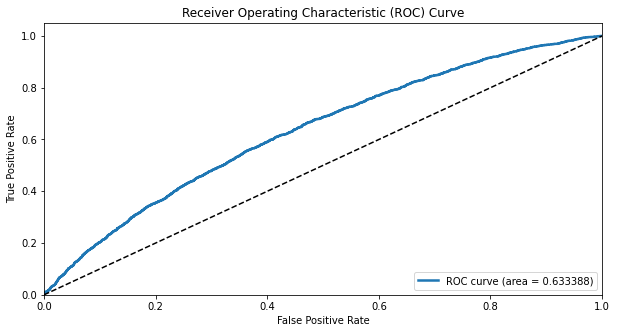

In [25]:
accuracy, precision, recall, f1_score = predict_model.get_performance(y_pred,y_test,labels=[0,1])
roc_auc = predict_model.plot_roc(cbc_randomcv,y_test,X_test)

#### 4.4 - CatBoost Classifier: Save model


In [20]:
utils.save_data_checkpoint(cbc_randomcv,'../src/models/trained_models/tuned/cbc_hyp.pickle')

Object saved successfully in ../src/models/trained_models/cbc_hyp.pickle with 0.92MB.


-----------------------------------------------
### 5.0 - Building a Multi Layer Perceptron Classifier
-----------------------------------------------

In [8]:
mlpc = MLPClassifier(random_state=42)

parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
     'max_iter':[200,100],
}

start_time = utils.timer(None)

mlpc_randomcv = RandomizedSearchCV(mlpc, parameters, n_iter=1, random_state=42, cv=4,scoring='roc_auc',verbose=8)
mlpc_randomcv.fit(X_train,y_train)

utils.timer(start_time)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


/home/app/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/4] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd;, score=0.634 total time=22.3min


/home/app/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/4] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd;, score=0.637 total time=12.7min


/home/app/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/4] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd;, score=0.622 total time=12.3min


/home/app/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/4] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd;, score=0.625 total time=12.6min
Time taken by function: 1 hours , 18 mins and 12.028578999999809 secs


/home/app/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 5.1 MLP Classifier: Best hyperparameters with RandomizedsearchCV

In [9]:
print(f'MLP Classifier:\n\nBest params:')
for key, values in mlpc_randomcv.best_params_.items():
  print(f'{key} : {values}')
print(f"\nBest Score: {mlpc_randomcv.best_score_:.6f}\n")

MLP Classifier:

Best params:
solver : sgd
max_iter : 200
learning_rate : constant
hidden_layer_sizes : (50, 100, 50)
alpha : 0.05
activation : relu

Best Score: 0.629306



#### 5.2 - MLP Classifier: Inference time

In [10]:
start_time = utils.timer(None)

y_pred = mlpc_randomcv.predict(X_test.iloc[0].values.reshape(1,-1))

utils.timer(start_time)

Time taken by function: 0 hours , 0 mins and 0.034675 secs


/home/app/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


#### 5.3 - MLP Classifier: Performance metrics and classification report

In [11]:
start_time = utils.timer(None)

y_pred = mlpc_randomcv.predict(X_test)

utils.timer(start_time)

Time taken by function: 0 hours , 0 mins and 0.326412 secs


Model Performance metrics:
------------------------------
Accuracy: 0.726
Precision: 0.43452380952380953
Recall: 0.16794478527607362
F1 Score: 0.2422566371681416

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      7392
           1       0.43      0.17      0.24      2608

    accuracy                           0.73     10000
   macro avg       0.60      0.55      0.54     10000
weighted avg       0.67      0.73      0.68     10000


Prediction Confusion Matrix:
------------------------------
      0    1
0  6822  570
1  2170  438


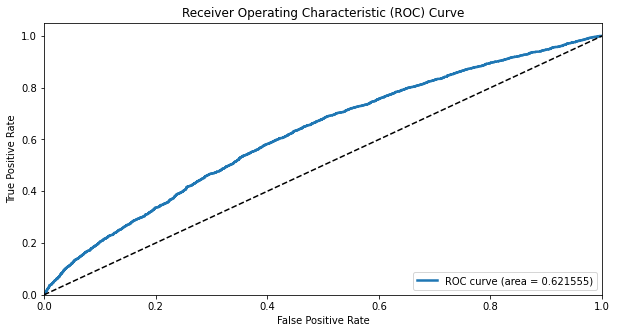

In [12]:
accuracy, precision, recall, f1_score = predict_model.get_performance(y_pred,y_test,labels=[0,1])
roc_auc = predict_model.plot_roc(mlpc_randomcv,y_test,X_test)

#### 5.4 - MLP Classifier: Save model


In [22]:
utils.save_data_checkpoint(mlpc_randomcv,'../src/models/trained_models/tuned/mlp_hyp.pickle')

Object saved successfully in ../src/models/trained_models/tuned/mlp_hyp.pickle with 1.56MB.
